# Data Cleaning (Part 2)

The objective of this Python notebook is to perform the last step of the data cleaning pipeline is as shown:
<div>
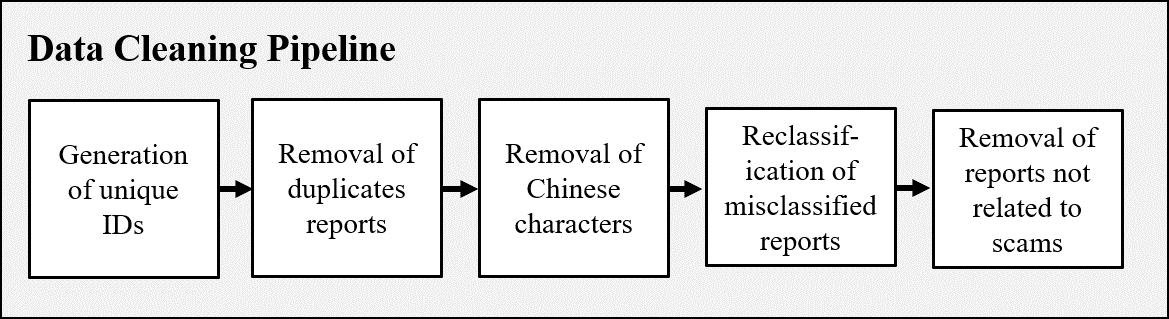
</div>

Specifically, in this notebook, we manually inspect scam reports to ascertain whether they correspond to correct classification of scam types, as defined on the 'Scam Alert' website.

## Import the necessary libraries

In [1]:
import pandas as pd
%pprint

Pretty printing has been turned OFF


## Load the dataset

In [2]:
# Load the csv file
scam_df = pd.read_csv("Data/scam_data_1.csv").drop(columns="Unnamed: 0")
scam_df

,submission_id,date,informant,incident_description,scammer_details,scam_type
0,20200717-fBLC6F,2020-07-17,Anonymous,\r\n They call me by whatsapp ...,\r\n Name: I only know ...,Impersonation Scam
1,20200717-yOxIAl,2020-07-17,Anonymous,\r\n it happened this morning 0...,\r\n Name: Ministry of ...,Phishing Scam
2,20200717-Tz5TyW,2020-07-17,Anonymous,\r\n I rceived a call from a la...,\r\n Name: SIngtel\r\n ...,Phishing Scam
3,20200716-O79B6r,2020-07-16,Anonymous,\r\n details: I received a call...,\r\n Name: Singapore hi...,Impersonation Scam
4,20200716-yIa3LH,2020-07-16,Anonymous,\n1) An impersonated junior technical staff ca...,"\r\n Name: SINGTEL, RON...",Phishing Scam
...,...,...,...,...,...,...
4585,20160722-Cnp9pS,2016-07-22,Loh Shwu Ghee,\r\n Received a call from +6565...,\r\n Name: OCBC\r\n ...,Impersonation Scam
4586,20160722-8MG7ru,2016-07-22,Mok Xin Jie,\r\n This lady by the name of a...,\r\n Name: 佳佳\r\n ...,Credit-for-Sex Scam
4587,20160722-lCSVfA,2016-07-22,Brad Dalton,\r\n Beware deceptive practices...,\r\n Name: Ascot Hotel ...,Home/Room Rental Scam
4588,20160721-iojUr7,2016-07-21,Shreeniwas Iyer,\r\n Holders of the following a...,\r\n Name: [email prote...,Impersonation Scam


In [3]:
scam_df.scam_type.value_counts()

Impersonation Scam             1469
Online Purchase Scam            776
Internet Love Scam              697
Investment Scam                 266
Phishing Scam                   241
Home/Room Rental Scam           218
Credit-for-Sex Scam             197
Money Mule Scam                 122
Job Scam                        111
Loan Scam                       101
Cyber Extortion Scam             87
Lottery Scam                     82
PayPal Email Scam                36
Cold Call Supplier Scam          36
Apple Scam                       31
Inheritance Scam                 28
Online Travel Vacation Scam      25
Software Update Scam             22
Kidnap Scam                      17
Spoofed/Hacked Email Scam        12
Car Rental Scam                   7
Wangiri Scam                      7
Line/Facebook Scam                1
Scam Using WeChat                 1
Name: scam_type, dtype: int64

## Method 1: Manually inspect scam reports with very short incident descriptions

Scam reports with very short incident descriptions are unlikely to be informative about the scams.

In [4]:
scam_df = scam_df.assign(len_incident_description="")
for i, j in scam_df.iterrows():
    j['len_incident_description'] = len(j['incident_description'])

In [5]:
d3 = scam_df.sort_values('len_incident_description').head(60)
d3.style.set_properties(subset=['incident_description', 'scammer_details'], **{'width': '250px'})

,submission_id,date,informant,incident_description,scammer_details,scam_type,len_incident_description
2433,20180511-UwOAnr,2018-05-11,m,m,Name: [email protected] Contact:,Impersonation Scam,33
2776,20180213-JSooSe,2018-02-13,jasmine,testing,Name: supplier Contact:,Cold Call Supplier Scam,39
2271,20180603-Lzlvgf,2018-06-03,David Yew,Scam call,Name: Police Contact:,Impersonation Scam,41
3625,20170622-Hm1bGQ,2017-06-22,Faith,Received an SMS,Name: Lee suet fun Contact:,Kidnap Scam,47
3549,20170712-hotSKn,2017-07-12,david,http://hdfbet.com,Name: http://hdfbet.com Contact:,Lottery Scam,49
2567,20180417-WGI6EP,2018-04-17,J,Missed Call from overseas.,Name: Uk Contact:,Cold Call Supplier Scam,58
2667,20180322-EzfSdK,2018-03-22,Malik,She claims she sells odds.,Name: Marwah Queens Contact:,Lottery Scam,58
2426,20180513-scUN5O,2018-05-13,Anon,Phone call imposing police.,Name: Automated voice Contact:,Impersonation Scam,59
2531,20180425-Ir7T2O,2018-04-25,Karl Luis,No use in my Country (India),Name: ipcnrmalls.top Contact:,Online Purchase Scam,60
1783,20180903-9HItmr,2018-09-03,Berl,His Real name was Reynan Ancheta,Name: Username: Jhaynan Ancheta Contact:,Investment Scam,64


## Method 2: Manually inspect each scam category

Here, we check records from each scam type to verify if the description of the incident fits the definitions of the corresponding scam type. For scam types with 100 reports or less, we inspected every report. For scam types with at least 100 reports, we inspected a random sample of 20%.

### Line/Facebook Scam

Description: "Scammers hack into your Facebook or Line account and use your identity to ask contacts to buy iTunes or other gift cards for them. Conversely, you might be asked by a friend to buy the cards urgently." (Source: NCPC)

In [6]:
scam = "Line/Facebook Scam"
d1 = scam_df[scam_df['scam_type'] == scam]
d1.style.set_properties(subset=['incident_description'], **{'width': '500px'})

,submission_id,date,informant,incident_description,scammer_details,scam_type,len_incident_description
1447,20181126-d021HT,2018-11-26,Anonymous,"There is this person called Calvin Chiang ,he chat with me on fb messenger and told me that he want to visit singapore so much.i was quite skeptical about it so go check the person personal info in fb,its stated hometown is beijing,but when i tried to ask him can speak or read mandarin chinese ,he told me that he cannot,with all sorts of nonsense excuse.but i did give him my contact no cos he pleaded me .he say that he on the way to singapore from netherland yesterday. Today morning he send me sms on trapped at kl airport during transit cos he bring 94000 usd while maximum can only have 10000 usd.he claim the malaysia authourity had confiscated his belonging and pay 4800ringgit inorder to be released and get back his stuff.he hope that i could transfer him 4800ringgit to help him out.and say he will give me 4000usd immediately once we meet at Singapore airport. i read and amused that this must be a scammer so just ignored it.during the afternoon,he Whatapps me that he is disappointed that i read and ignored his message.i was even amused by his ability to know that i actually did read his message cos i pretty sure that sms dont't have this function unlike Whatapps.i was certainly this is a scam for sure.i only lost my hp contacts",Name: calvin chiang Contact: 601136474559,Line/Facebook Scam,1282


### Scam Using WeChat

Scammers use pop-up or online ads to sell game credits or Chinese Reminbi at attractive rates. These ads often appear in popular games such as The Legend of the Condor Heroes, Jian Xia Qing Yuan 3 (剑侠情缘), Three Kingdom Rush, and Xi Fei Zhuan (熹妃传). When a victim clicks on the pop-up ad, they will be instructed to add the seller on WeChat. Thereafter, the victim is asked to register an account on a website in order to receive the game credits. During registration, the victim is asked to provide their personal information and bank account details.

When registration is complete, the victim is asked to make payment for the game credits via Alipay, iTunes or MyCard. Once payment is made, the scammer does not deliver the game credits and becomes uncontactable. Some victims are asked to make multiple payments for various fees or to authenticate or activate the bank account.

In the sale of foreign currencies, scammers ask victims to transfer money to a Singapore bank account before they can receive the Chinese Renminbi in the victim's WeChat or Alipay account. Once the transfer is done, the scammer becomes uncontactable and blocks the victim on WeChat.


In [7]:
scam = "Scam Using WeChat"
d1 = scam_df[scam_df['scam_type'] == scam]
d1.style.set_properties(subset=['incident_description'], **{'width': '500px'})

,submission_id,date,informant,incident_description,scammer_details,scam_type,len_incident_description
1454,20181122-S9AZwa,2018-11-22,Anonymous,"Met eugene yeo(jiedong yeo) from okcupid.com. I know him for half an year. So when he said he didn't bring enough ￥ in cku competiton , and the dog show can't accept credit card to pay, then requested me to borrow him ￥20000, I lent 6000. But after the show, he deleted me from Wechat, didn't pay back. I have sent friend request to ask him, he blocked me. As I known, he has enough money, but he just wants to scam money from others. Guess he covers well in Singapore .",Name: Eugene jiedong yeo Contact: 6585339990,Scam Using WeChat,504


### Wangiri Scam 

This scam gets its name from the Japanese word Wangiri — 'wan' means 'one' and 'giri' means 'hang-up'. Victims receive a phone call from an overseas number, which rings just once. If they return the call, they will hear an advertisement for a subscription to a premium chat line or internet services. Victims are charged a premium for this call.

In another variation of this scam, the caller, claiming to be an official, leaves a voice message informing the victim that there has been an emergency to which they must respond by calling them back. The latest version involves WhatsApp messages with contact attachments. Victims incur a hefty fee when they call that contact.

In [8]:
scam = "Wangiri Scam"
d1 = scam_df[scam_df['scam_type'] == scam]
d1.style.set_properties(subset=['incident_description'], **{'width': '500px'})

,submission_id,date,informant,incident_description,scammer_details,scam_type,len_incident_description
1970,20180801-Q7Dfs7,2018-08-01,Dr.PTBN,"Since 1st August 2018, i am getting numerous calls from this +370 numbers . I have not pick up or called this number because its checked coming from Lithuania country which never makes sense since i don't have any business or partners over there. I have blocked these numbers on my phone but apparently getting calls with +370 with new extension numbers. Advice: PLEASE DO NOT CALL BACK OR RECEIVE CALL. ITS A WANGIRI SCAM! Dr.Ptbn",Name: Lithuania +370 number Contact:,Wangiri Scam,456
2501,20180504-29rAqb,2018-05-04,Eng-Huat,"I recieved this unsolicited SMS this morning at 9.14am from 79900: ""You are subscribed to lbsg/Weekly. Visit http://sg.thelogicalbase.com/unsubscribe.php. U’ll be charged S$10.70 w/GST by 05/05/18. To Opt Out send STOP lbsg to 79900. Help 63387005"" Looks like a scam and I did not respond to it. Suspect I will be charged if I reply to the message. Called M1 instead to activate the PRS (Premium Rate Services) Barring for my mobile phone.",Name: sg.thelogicalbase.com Contact:,Wangiri Scam,474
2691,20180315-nnfy1R,2018-03-15,Andrea,"I missed the call and thought that it was a local number, only to know that it might be a possible scam call after hearing a cut off tone when i returned the call. This morning, my mum received a similar call from the same possible number. I am afraid that my personal information is being leak out.",Name: Anonymous Contact:,Wangiri Scam,320
2694,20180314-rPC9RM,2018-03-14,Vincent,"I received a call from 62788112 on my mobile. The caller was quiet then just say ""Postman, Postman"". I went out to check but nobody was outside my door. Anyway, it didn't cross my mind how can a postman be calling your HP thru a local line 62788112 instead of HP line. I hit redial on HP to check & my HP went hung. Anyway, I was able to do a reboot after some 15s. I did called 62788112 using my local line 3X with each call that got thru, they just hung-up. Internet claimed this no could be a scam",Name: Incoming call to my mobile phone Contact:,Wangiri Scam,532
2879,20180112-d02YoG,2018-01-12,Gana,"Receiving calls recently from the number +41799779623 originating from switzerland, suspect it could be related to Wangiri scam. Usually is a missed call, but if attend i hear automated voice of a lady saying hello darling, which I believe is targeted for guys to attract and trigger to call back them to charge call money value. Luckily read few articles about the scam and have blocked it.",Name: Not Sure Contact:,Wangiri Scam,424
4156,20161215-uYA5rU,2016-12-15,Mandy,"I have received a miss call and a VM from +65 68543000. When i checked my VM box, it is an automated-voice message asking me to return call to the same number. The message says ""I have a urgent message from UOB, please call +65 68543000 to retrieve the information"". I have not called back, as I dont' have an bank account with UOB, and given the recent string of phone scams from DHL to Police force, and reckon the scammers might have changed to using bank names now.",Name: UOB (United Overseas Bank) Contact:,Wangiri Scam,503
4194,20161128-IZzaew,2016-11-28,Natasha,"Since 21 Nov 2016, I have received missed calls from Canada. Since I have no relatives, friends or colleagues in that country, I did not pick up the call. And the calls were usually Singapore 4-6pm which Canada would be mid night. This made me even more suspicious about phone scam. After I blocked the number, another number appear calling me again. Please take note of below no : +1 647 523 2390, +1 647 523 5497",Name: NA Contact:,Wangiri Scam,446


### Car Rental Scam

If an ad for a rental car seems too cheap to be true, then it's probably a scam. The car rental scam tricks victims into paying a deposit or the full rental fee before receiving the car. After payment has been made, victims find that the agency and car do not exist.

In [9]:
scam = "Car Rental Scam"
d1 = scam_df[scam_df['scam_type'] == scam]
d1.style.set_properties(subset=['incident_description'], **{'width': '500px'})

,submission_id,date,informant,incident_description,scammer_details,scam_type,len_incident_description
1482,20181105-7Zf9D9,2018-11-05,hishamudin,"i am a grab driver driving a 6 seaters premium care was told by the so called name kelvin tan he wi get back to me ASAP.after a few days later he called me up to fetch girls from vietnam and i will earn a commission of $80 per head.and i agreed . after few days later he had asked for 50% of the air flight ticket for them to come over to singapore .total transferred was $3950 for the 13 girls plus cargoes and fine from the vietnam ladies .right now i m seeking the full amount from this kelvin tan which a singaporean .and he he kept asking if i had iPad ,iPhone,and even asked to ask for the deposit of the car rental .at that time of point i had put a full stop as i g\felt something wasn't right. beware of this guy name kelvin tan whom will rent a car for his own benefits . best regards.",Name: KELVIN TAN/vu xuan duc Contact:,Car Rental Scam,831
1511,20181030-ZRdEFD,2018-10-30,Nyko Iekov,"On 13rd of October Tenerife South I was lied by an employee called Maria Jose that I cannot pay the car deposit by debit card(my credit card had expired 2 month before and I hadn't noticed). The only way to have the car according to her was to pay for their full insurance. I had already bought insurance online and I had previously paid car deposit by debit card at another car rental company(they charge you and then refund it) and I certainly didn’t want to pay extra 140 Euro for second insurance (which I bought for 20 Euro online). I tried to argue but the attitude on the other side was like: “NO, you can’t. Tell me what you want to do”. I asked her twice if she was sure it cannot be done by Debit card – she said “Yes, I am” (I have a witness to confirm). Since there was a queue of people and she wasn’t going to give me the car I paid for this shockingly expensive insurance. https://www.youtube.com/watch?v=8I6nPXtaPGQ",Name: Goldcar Contact:,Car Rental Scam,964
1797,20180831-KRIoKZ,2018-08-31,Helen,"My mobike 30D pass was auto renew on22 Aug2018- exp Sep Without my Approval. After 2 ride, Mobike claimed my acct freeze n start to chg me 0.50cts when I unlock on 30 Aug onward while my 30D Pass is still Valid. Wrote many emails to Mobike customer Support email addr, asking to rectify my acct, they DID NOT reply. I tried to unlock today 31 Aug at 2.20pm, still chg me 0.50cts once Mobike syst Unlock. I plan to lodge police report ths Sun 2 Sep",Name: Mobike singapore Contact:,Car Rental Scam,482
1977,20180731-62f64C,2018-07-31,Teo Chia shiang,A bankruptcy using his father name registering a company . Using the company MI destino which is listed at sgcarmart . He claim to be the registered owner and deal in car. Operation modus is the same. He on purpose disappeared after the deal is concluded for sincere buyer and force them to agreed to exorbitant interests loan which amount to few thousands with no intentions to sell. This is after deposits is paid. A posting is advertised on facebook and more victims came out.,Name: MI destino /shanmugan s/o anawi satrine Contact:,Car Rental Scam,512
2249,20180610-dYTCTr,2018-06-10,Muhammad Solikin,"I was looking for a car to rent during the Hari Raya weekend from 14 June 2018 to 18 June 2018. Responded to an ad in Carousell that had very little details and request to PM for more details. When in the chat, car offered was a BMW 3 Series at a price of $350 for 5 days rental. When asked which company he is from, he replied he is from Woodlands Auto. Googled the company website, but the website had no such car available for rent. Found picture of car on ad on Ace Drive website.",Name: cheapcarrentalsg Contact:,Car Rental Scam,523
2769,20180218-LldTdp,2018-02-18,Farit Ismeth Bin Ali,Received a text message from the above-mentioned number claiming that I applied for PDVL revision course and that my booking on Monday 19 Feb 2018 9am-1045am has been confirmed. I did not applied

### Spoofed/Hacked Email Scam

A scammer impersonate a victim's supplier using a similar email address. The victim will be told to transfer money to a different bank account because the supplier's regular account has been suspended or is under audit.

In another variant, scammers will hack into their victim's email account, that of the supplier's or business partner's. They will monitor the email correspondence between the two and at an opportune time, send an email to their victim to request for payment to be paid to another bank account. The spoofed email used by the scammer can closely mimic that of the original email address. 


In [10]:
scam = "Spoofed/Hacked Email Scam"
d1 = scam_df[scam_df['scam_type'] == scam]
d1.style.set_properties(subset=['incident_description'], **{'width': '500px'})

,submission_id,date,informant,incident_description,scammer_details,scam_type,len_incident_description
645,20200127-1ARFK4,2020-01-27,Anonymous,I received an email mentioning that they have deposit /transfer money into my account and asking me to click the link to check the transfer receipt proof. Editor's Note: Please do not click on any links found in suspicious-looking emails.,Name: Unknown email Contact:,Spoofed/Hacked Email Scam,272
1384,20190101-JYrCp1,2019-01-01,Anonymous,"The email appeared in my school email's spam folder. I only opened the email a few days after it was sent. The email claimed that an email was sent from my account to myself, therefore the sender has full access to my email account. It also mentioned that a Trojan Virus through an adult site gives the sender access and control of my devices over a computer and that he is able to see everything on the screen, microphone or camera. It then demanded that I transfer $782 to his Bitcoin account, otherwise supposed embarrassing footage of me will be released to all emails and contacts on social networks. I did some checking and found out that it was actually a Sextortion scam (https://www.spamtitan.com/blog/new-sextortion-scam-emails-sent-users-email-account/). The Bitcoin account mentioned in the email was also heavily reported in a Bitcoin Abuse Database (https://www.bitcoinabuse.com/reports/18QtUZKEsuY9gvviSsZCweyPRLSDndU6Xu?page=5). Hope the public can be more aware of such scams and prevent themselves from falling for it.","Name: Email was sent by a spoofed email, supposedly my email Contact:",Spoofed/Hacked Email Scam,1074
1576,20181011-breIyD,2018-10-11,Susie Tan,"Please be on your alert when someone send you a whatsapp text saying that he wants to buy your used products from gumtree or facebook. He claims that he is interested to buy your used products and negotiate with you then said that there will be an agent to pick up those things from you. He said he will transfer the money to you and ask for your Name, Bank Account, Email address and Residential address for the pick up. Then he will ask you to check your email for a confirmation receipt from ROYAL BANK OF SCOTLAND ([email protected] - this is definitely not from the bank). This email mentioned that in order for me to receive my payment, I need to pay $200 first then the money will be released. Below is the details of the email from the ""bank"": ""The transfer has been approved and the funds have been debited from the buyer's account, You may see him make an additional payment ($200 SGD) which is the agent's fee. In the other into your account, you only have to pay the money to the account details that will be sent to you and scan your payment receipt back to us. (Immediately after this your Account will be credited and you are notified). We do this to protect both buyers and sellers from fraud and the system used to comply with the Consumer Protection Program. Due to the fact that (Royal Bank Of Scottland) , and saving alternatives to sending cash by mail, Federal Water Credit Union's Union helps build a strong community by helping people achieve their dreams. We achieve a higher standard every day, in everything we do for our customers, shareholders, partners and communities, where the future prosperity of our company lies..."" The guy insist that he has transferred the money and ask me to follow the procedure to complete the whole transaction. Please note that there is no such practice in banks and this is an obvious SCAM. Do aware of such people sending whatsapp message especially those from overseas number.",Name: MR MUHAMMAD Contact:,Spoofed/Hacked Email Scam,1979
1592,20181009-AdQhME,2018-10-09,Sean,"Received an email an hour later after an Invoice came from our supplier to make payment for an order that we placed. We then received another copy of the invoice this time with the banking information attached.However, after realizing that the Banking information provided did not match the 

### Kidnap Scam

Victims get a call from someone claiming that a loved one of the victim has been kidnapped. During the call, victims might hear screaming or crying in the background.

In [11]:
scam = "Kidnap Scam"
d1 = scam_df[scam_df['scam_type'] == scam]
d1.style.set_properties(subset=['incident_description'], **{'width': '500px'})

,submission_id,date,informant,incident_description,scammer_details,scam_type,len_incident_description
11,20200714-VC1BuG,2020-07-14,hAIRUL AZMI BIN HADURI,"I received a text message on my phone from a number shown as 9000. it stated as follows, ""ws me now 96600596 Matthew! daughter is with me! u better bank in $3000 to ???-981-913 posb sav now! better dun call police! if not i will kill her!"" it is very distressing to receive such a message.",Name: mATTHEW Contact: 96600596,Kidnap Scam,324
143,20200531-NJYkno,2020-05-31,Anonymous,I received an sms on 31 May 2020 around 7:39pm stating that: ur girl is with me! u better bank in $2000 to my ???-983-4971 Standard chart now! bette dun call police!if not i will kill her! 87163571 rayno I knew it was a scam and I would like to share this to raise awareness. Please contact your loved ones immediately to check on them; do not panic and do not transfer any money to this bank account.,Name: 9000 Contact: 87163571,Kidnap Scam,435
149,20200528-ryHt3X,2020-05-28,Anonymous,"Received this text message during cb period, where i and my daughter are all at home. the message read out: ur daughter is with me! u better bank in $2680 to my bank ???-395-1892 uob sav now! better dun call police! if not i will kill ur daugter! 97499739 rayno.",Name: RAYNO Contact: 97499739,Kidnap Scam,297
1208,20190601-AkIFOK,2019-06-01,Anonymous,"1) I got this kidnap scam sms. It was obvious it was a scam because I'm 16 and have no children. THe sms is as follows "" I KIDNAPPED YOUR DAUGHTER/SON , CALL ME NOW BEFORE I KILL HER. DON'T TRY ME PREPARE A RANSOM OF 10K NOW!!!!!"" Yeah, horrible grammar. 2) It happened 1st June 2019 at 5:34 PM. 3) 10 seconds of my life was lost from reading this SMS",Name: jun kai (npcc) Contact: 6582024898,Kidnap Scam,387
1210,20190601-dXuCeC,2019-06-01,Anonymous,"The scammer claim that my daughter/son has been kidnapped and request for a 10k ransom. the original message is ""i kidnapped your daughter/son , call me now before i kill her. don't try me prepare a ransom of 10k now!!!!!""",Name: N/A Contact: 82024898,Kidnap Scam,256
1856,20180823-WaqXaR,2018-08-23,KIM,Why those student who joined singapore idol or some hooligan break into school trying to show what they did to student who got pushed down the building in school. There's few student died in campus. Then is it some pervert from the same group that hide in school toilet doing masterbating? I still see same father with teenager or old woman with teenager went to office ladies describing body figure or pubic hair of office ladies mother not according to their expectation. Malaysian? cleaner?,Name: Is mediacorp involved some pimping or filming for porn kind of hooligan business? Contact:,Kidnap Scam,528
1882,20180820-IDvZx9,2018-08-20,Lee Tien Soon,"Text message detail below i kidnap your daughter , if you want your daughter safe. bank in $5000 now POS SAV 195-497-745 DONT REPORT POLICE , U REPORT I WILL KILL HER.",Name: +92203554 Contact:,Kidnap Scam,202
1884,20180820-nnvgaY,2018-08-20,Joleen,"This person texted me on 20/08/2018 @ 1.50pm I kidnap your daughter, if you want your daughter safe. Bank in $5000 now POS SAV 195-497-745 Dont report POLICE, U REPORT I WILL KILL HER.",Name: No name was given Contact:,Kidnap Scam,204
1955,20180805-u5pjQ3,2018-08-05,Anoynumous,I got call from a guy with a heavy indian accent that said that my son was kidnapped and I had to pay 30k as ransomand was to leave it in a bag under a car with a number plate that I do not want to give. I immediately hung up.,Name: Was not given Contact:,Kidnap Scam,258
2115,20180629-tOhpkc,2018-06-29,lionel wong,"YOUR DAUGHTER IS IN MY HANDS, IF I DONT RECEIVE $20000 IN MY BANK BEFORE 5 PM YOU NO NEED TO SEE HER ANYMORE. YOUR PHONE HAS BEEN TRACED, IF YOU REPORT TO THE POLICE OR TELL ANYBODY I WILL HURT HER. JUST GO TO THE BANK AND TRANSFER 20000SGD TO 228 458 945 POSB SAV. UPON RECEIVING THE MONEY I WILL LET HER GO. DO NOT CALL ANYBODY INCLUDING YOUR DAUGHTER.",Name

### Software Update Scam

Victims receive a call from someone claiming that their computer is in need of a security or software upgrade. To get the upgrade, victims must give their software user account ID and password to the caller. Sometimes, victims are asked to type several commands onto their computer, after which their computer system falls under someone else’s control. Alternatively, victims might be asked to purchase additional software online. When they do, the scammers take their credit card or bank account details for their own fraudulent use.

In [12]:
scam = "Software Update Scam"
d1 = scam_df[scam_df['scam_type'] == scam]
d1.style.set_properties(subset=['incident_description'], **{'width': '500px'})

,submission_id,date,informant,incident_description,scammer_details,scam_type,len_incident_description
172,20200522-kXUK9v,2020-05-22,Anonymous,"The scammer (lady with indian accent), pretended to be microsoft singapore called me twice (22/5/2020) and asked me to log into my computer saying that There were some foreign IP addresses which were connected to my home network, and she wanted to help me to resolve . They also sent me an spam email. i didn't lost anything as i knew it was a scam. I am sharing this scam to warn the rest of netizens.",Name: Microwebsoft Technical Team Contact: 68888877,Software Update Scam,437
219,20200504-0D0m3t,2020-05-04,Anonymous,"I received a call from a guy with a thick indian accent. he said my wife full name and WANT to SPEAK to her. He said he is from microsoft support claiming my wife computer had security issues, he need to install driver for her. Knowing that things doesn't add up. I hung up the phone.",Name: unknown Contact: 6531381701,Software Update Scam,317
228,20200430-wHgFAx,2020-04-30,Anonymous,"received call from +65 3138 1701 at local time 18:48hrs on 30april2020. the guy identify himself calling from windows total care center, technical department. he said my computer just send windows an error message. He then started off to say ""I need to verify your computer id with you before proceeding."" he than instruct me to do the following: - press windows logo key + R - than type ""cmd"" and enter - when see black screen, type ""assoc"" and enter. ""you will see a long page of wordings and third line from the last is your computer serial number which I will verify with you."" - the third line from ""assoc"" cmd.. - he continued to instruct me type ""eventvwr"" and enter. - he than asked to instruct to click on ""custom views"", and ""administrative events"". - he asked how many number of events showing, which I replied over thousands. and he said ""oh my god, so serious problem"". - by than google and found that there have been similar scams using similar that dated back as far as year 2012. I hung up the phone after I told him that my computer has been working fine and if I encounter any serious problem I will call windows support directly. this issue brought to my attention on how, where and when did they get information of my name and my mobile number and not sure what other information were in their database.",Name: indian accent guy from company Windows total care Contact: +6531381701,Software Update Scam,1371
455,20200315-1jveLB,2020-03-15,Anonymous,"I first received a phone call from a girl with Indian accent who claimed to be sophie soon from microsoft tech support team. She had my name, Email and number. She told me that there were problems with my computer but I told her that I didn't experience any problem and my computer was new. She said she will show me the PROBLEMs. After receiving multiple calls from her, I relented as I did an old computer which was problematic and I sent a diagnostic report to Microsoft. She asked me to run a series of codes via the command box and fooled me into thinking that there was a problem with my computer. I later found out that the ""problems"" existed in all computers. She then wanted to gain remote access to my computer and I felt uncomfortable, so I questioned her identity and she gave me all except for her company phone number. I grew suspicious and CONTINUEd to question her about THe number she used to call me. She immediately transferred my call to her supervisor, a guy with indian accent who was more adept at talking. I granted remote access although I felt uncomfortable and he started running diagnostic tests on my computer. He then asked for my name, billing address, email and phone number which I thought they should already have. I divulged everything excerpt for my billing address. I then called Microsoft to verify while they had remote access to my computer...I managed to abort the connection when they tried install something on my

### Online Travel Vacation Scam

Scammers place online ads for a vacation at outrageously cheap prices. Upon leaving for the trip, victims find that the hotel accommodation and air travel they had paid for were never booked.

In [13]:
scam = "Online Travel Vacation Scam"
d1 = scam_df[scam_df['scam_type'] == scam]
d1.style.set_properties(subset=['incident_description'], **{'width': '500px'})

,submission_id,date,informant,incident_description,scammer_details,scam_type,len_incident_description
888,20191010-Jh5mmn,2019-10-10,Anonymous,"a guy who claimed that he is from wyndham vacation and said that i am selected to get a special vacation treat on 10th october 2019 time 1640, and mentioned that i need to answer 5 pre-requisites questions asking me more of my personal details such as my marital status. later he also shared that i could just use sgd 99 to choose 3 special destination, bangkok, phuket or indonesia. when i told him i find it too good to be true and refuse to answer his questions that i find it is personal, he later said his time is precious and hence hung up. i later tried to call up to make sure that the number is valid, this time a lady picked up the call and told me another story about their company is promoting a great deal promotion but first i need to again answer the 5 questions before i can proceed and before they sent an confirmation email to my mailbox. this time i chose to just hung up. If you received such cold calls, simply ignore and don't provide yoour info.",Name: Wyndham Vacation Contact: 31581454,Online Travel Vacation Scam,990
1780,20180904-xvmQdw,2018-09-04,Rason,"From: [email protected] [mailto:[email protected]] Sent: Tuesday, 4 September, 2018 8:42 AM Subject: rhs1886 - Payment Link for 4120G Dear Rason Yang, Greetings from Raffles Hotel Singapore! Thank you very much for being in touch with Raffles Hotel Singapore earlier. Please be reminded that your payment of SGD 111.00 is due in 5 day(s). Click her to make payment to Raffles Hotel Singapore For assistance, please contact Winnie Xu at +65 6412 1338 Again thank you very much",Name: Winnie Xu Contact:,Online Travel Vacation Scam,515
2174,20180622-UNMPdl,2018-06-22,Anthony,"I received a call #69208594 claiming to be representing Realty Access to assist with the sale of our Time share membership. We made an appointment to meet at their office at Chinatown Point #17-09. When arrived at the office we met with a person introduced himself as Anthony Fernandez representing Club AX Services Pte Ltd being appointed by Realty Access to reach out to all existing members to verify if we are willing to return the membership for $$ gain. But we have to pay $2,000 as admin fee.",Name: Club AX Services Pte Ltd Contact:,Online Travel Vacation Scam,531
2371,20180519-4ia87F,2018-05-19,LEE KWEE CHUAN,"On 17 May 2018, I purchase 5 pax air ticket to Bangkok for a vocation to Bangkok. I log in www.tripadvisor.com.sg to search for the best deal of air ticket. The Bravofly offer the best deal online and as such I went into purchase the 5 pax ticket at SGD$1150 using my credit card. I was surprise that my bank SMS me that a transaction of USD$945.10 (SGD$1,266.43) was make. Till date , my air ticket was never been confirm by Bravofly. Many negative feedback in Bravofly Facebook Page.",Name: BRAVOFLY Contact:,Online Travel Vacation Scam,518
2550,20180421-2zO1qb,2018-04-21,vinod,"I had tried to book an apt for rent for 2 days on Agods/AirBnb. I got a mail from this id, asking me to send the money and the unit is confirmed. A sum of Euro 750 for 2 days rental. I was travelling with 2 young children. After I did the transfer, there was an acknowledgement from the mail id, confirmation the receipt of money and that they will send us the Programme - but after that there was no reply at all from them.I tried contacting Air BNB - no help either. They did not even revert.",Name: AIRBNB Contact:,Online Travel Vacation Scam,526
2622,20180331-GQjUtK,2018-03-31,packirisamy kumar sathish,"Dear Sir/Madam, I am sathish, working in DBS bank, Singapore. I got that same scam call today 31Mar2018 12:55PM SGT who is telling calling from MoM singapore and said you are not checking properly while immigrate to singapore from india. Asked me to verify last travel date from india to singapore. i said last month then that call was disconnected suddenly from his end. i suspect that 

### Inheritance Scam

Victims receive a letter, call or email stating that they have been left a large fortune. However, to have the funds released, victims must first pay the administration fees and taxes.

In [14]:
scam = "Inheritance Scam"
d1 = scam_df[scam_df['scam_type'] == scam]
d1.style.set_properties(subset=['incident_description'], **{'width': '500px'})

,submission_id,date,informant,incident_description,scammer_details,scam_type,len_incident_description
165,20200527-wrrzKU,2020-05-27,Anonymous,"At 2.08pm on 26 May 2020 Tuesday, I received an email to my personal email (Junk folder) with my full name in the subject title. I opened it and read the entire email as it had all my details. I was very shocked and almost believed it as my full name, mobile number, date of birth, and address were stated in the beginning of the email. These details are all accurate/current. Because I share the same last name as this 'barrister' as well as have some relatives in Malaysia, I first thought the email to be true. However, the tsunami disaster in December 26, 2004 seemed like such a long time ago for any inheritance matter to occur. I knew it was a scam when he said that ""we would share the percentage on a mutually agreed-upon 60% for me and 40% to your kind self"" which seemed like an unfair percentage. I am worried because if this scammer managed to get my personal information, other people/scammers out there may have gotten my information. Thankfully, the NRIC field is left blank which meant that the scammer may not have this piece of information which is the most crucial. No money was lost except my personal information (which I did not give my consent in giving away this piece of information, the scammer had it already). I showed my daughter this scam email, she did some research and found someone who has reported this email as fraud several years ago and she later advised me to share my story on this page. Scammer's email addresses: [email protected] [email protected]",Name: Contact: +60109127393,Inheritance Scam,1513
413,20200324-TvpbP3,2020-03-24,Anonymous,"I have just received a fax saying that the person, edith hans-adam from leichtenstein, will be dying any moment and has an inheritance valued at $24,150,000 in his family vault. He wants me to be his beneficiary and will give me everything if i send him an email and not by fax or phone call.",Name: Frau Edith Hans-Adam Contact: 42323544000,Inheritance Scam,294
1206,20190602-2ofMgP,2019-06-02,Anonymous,"I received a fax from a Keith Oliver stating that I was eligible to receive the death benefit payout of his late client. According to him, his late client had died without a surviving relative. Due to the both of sharing the same last name and nationality, the life insurance policy of $7M+ can be legally paid to me. He also mentioned that if no beneficiary is presented by the end of May 2019, then the policy will be cancelled. This sounded too good to be true! I was suspicious and found that the firm Peters and Peter LLP is often used by criminals as part of inheritance scams:www.petersandpeters.com/scam-emails! Also, the e-mail provided in the fax https://petersandpetersllp.com isn’t even their real website! So glad that I verified it myself before I could fall for the scam!",Name: Contact:,Inheritance Scam,788
1284,20190410-kE3ZOc,2019-04-10,Anonymous,"Inheritance Scam email: From Mr. Ben Adams Branch Manager Standard Chartered Bank Takoradi Ghana. Dear Friend Business Proposal For You I anticipate that you will read this mail quickly and let me know your opinion or willingness on this classified information. Firstly, I am a happily married man with 3 kids and therefore I would not want to be jeopardize this financial status that will give my family a secured future. I am Mr.Ben Adams the branch manager of the Standard Chartered Bank of Ghana, Takoradi Branch. I am 51 years of age and married with lovely kids. I do not know how to do that, but I do not know how to do it, and I do not know how to do it. doing this transaction with me. I only hope we can assist each other. If you do not want this business offer I will not contact you again. I have packaged a financial transaction that will benefit both of us, as the Regional Manager of the Standard Chartered Bank of Ghana, Takoradi Branch; Ghana is the capital city of Ghana. It is 

### Apple Scam

In this scam, scammers tell victims that they or their loved ones are about to experience misfortune, which they can prevent by performing a ritual. As part of the ritual, money or valuables are placed in a plastic bag or container. Victims are told that the bag or container can only be opened a few days later or the ritual will not work. When the proper time has passed, victims open the bag to find that the valuables have been replaced by worthless items like fruit, newspapers or sugar.

In [15]:
scam = "Apple Scam"
d1 = scam_df[scam_df['scam_type'] == scam]
d1.style.set_properties(subset=['incident_description'], **{'width': '500px'})

,submission_id,date,informant,incident_description,scammer_details,scam_type,len_incident_description
1578,20181011-DDD8uw,2018-10-11,amy,"Hi Stomp, I would like to contribute my experience to help others to look out for digital scams. The scammer did send me an email and a link to ""unfroze"" my account, and it is true that I changed phone recently and did not save my full details or credit card on my phone. The email and website looked very well done with all the high resolution latest iphone posters that anyone would easily fall for it (they even include real address in email!) So I did a little investigation : (Suddenly became a sherlock) 1. The URL link : www.appleid-privacy.net/identity/login looks unreal 2. The other options on the website can not be clicked 3. The info request for Credit Card info and CCV I have checked google that this email address has not been found relating to anyone commenting the scam. I have also submitted the experience to Scam Alert website, I am not working for Apple nor promoting anything, just hope to share this out so that more people can protect their hard earned money.",Name: www.appleid-privacy.net/identity/login Contact:,Apple Scam,1023
1643,20180930-hu9Pep,2018-09-30,iqiewhot,"DEALT ON CAROUSELL FOR AN IPHONE X BRAND NEW SEALED SET FOR 1.33K. THIS DUDE APPARENTLY HAS A SHOP MOBILE FRIEND IN MARINE PARADE. ENDED WORK LATE SO REQUESTED FOR DELIVERY. HE SENT AN IPHONE X SEALED SET TO ANG MO KIO AS AGREED. ON THE SECOND DAY OF USING THE PHONE, I REALISED THE PHONE'S SPEAKER GRILLS ARE FILTHY, I THEN PROCEEDED TO CHECK ON APPLE WEBSITE FOR THE WARRANTY COVERAGE USING THE IMEI OF THE IPHONE X. TO MY SURPRISE, IT EXPIRES IN 3 MONTHS TIME. I PAID RETAIL PRICE FOR AN OLD PHONE",Name: fmobile/MOBILE FRIEND Contact:,Apple Scam,532
1678,20180922-FYJ1RD,2018-09-22,SFS,"21 Sep 2018. A buyer from Gumtree was using WhatsApp-ed to contact me said interested to purchase the Iphone X Max that I listed on Gumtree, and he said he's buying it for his daughter birthday present and he's at offshore working. We exchanged some messages and later when i deleted my information, he sounded angry. He said like “Wait for more problems to come” in threatening way. He captured the transaction receipt from Bank of America and sent it to me. george samson +601126884189",Name: george samson Contact:,Apple Scam,520
1694,20180919-eOEEGR,2018-09-19,Cara,A few weeks ago a man by the name Dan Baxter asked to be my friend on Instagram. He claimed to be in the army and doing a special assignment in Ukraine. Within a few days he asked me to purchase a iTunes Card for him to finish his assignment. It wasn’t much so I thought nothing of it. A few days later he was begging me to buy him another but before I did I reversed looked up his picture. He is a scam artist! A fraud. I blocked him on all sites.,Name: Army Contact:,Apple Scam,480
1698,20180918-39PXsN,2018-09-18,kat,"17/8/18 went apple orchard to repair iphone7+ cannot startup. they cannot repair offer to trade in new for $529 19/8 went eden to data retrieval sales say can repair for $120 in 1-2 hrs. after 4 hrs i come back sales say cannot repair. 26/8 try repair at another shop but upon examining they say my phone modifed, parts replaced. 31/8 went apple they confirm the parts replaced and cannot tradein only eden i left phone out of sight they challenge me report police police cannot take action them",Name: eden technology Contact:,Apple Scam,532
2183,20180621-NESMjS,2018-06-21,Florence,"I was trying to purchase hua Wei P20pro from a seller through shopee, seller contacted me via watsapps and explained why shoppe was slow to release payment to them and why the need buy direct. He wanted to have full payment of $500 before delivey, agreed to deposit of $200-300 but I refused so ended up transferring $150. The next morning, he sent a text informing full payment has to be made so I knew he was out to cheat. Msia number 60-16-258-621",Name: Aneekha Contact:,Apple Scam,482
2260

### PayPal Email Scam

Scammers prey on sellers on online auction sites like Ebay and Carousell. They might agree to buy an item from the seller and make payment through PayPal. They then send the victim an email that looks like it had come from PayPal stating that the money has been sent. The seller is asked to provide shipment details or pay an admin fee before the payment can be released. Under the impression that it is a legitimate instruction from PayPal, the seller mails the item to the scammer.

In [16]:
scam = "PayPal Email Scam"
d1 = scam_df[scam_df['scam_type'] == scam]
d1.style.set_properties(subset=['incident_description'], **{'width': '500px'})

,submission_id,date,informant,incident_description,scammer_details,scam_type,len_incident_description
110,20200611-d40B7d,2020-06-11,Anonymous,"'Buyer' claimed to be in usa, and wanted to buy my product to be sent to malaysia. He sent me a paypal email showing that payment was made. but on closer scrutiny, i realised it is a fake image.",Name: jason nadel Contact:,PayPal Email Scam,226
1849,20180824-J3Ji4A,2018-08-24,Joshua,"I was logging onto my com to do something, as I have just woken up, when I noticed I got the usual assortment of random emails from website I subscribed to. I then notice this weird looking email from what claim to be paypal support for gifts card purchase. Seeing as it was dated today, 24/08/2018 @ 0709, I thought It was suspicious, as I was definitely asleep. Luckily, my sister noted how odd it was. Thankfully, nothing happen, and I emailed it to [email protected] ^~^",Name: Paypal Support Contact:,PayPal Email Scam,507
1886,20180819-IeUb7q,2018-08-19,Anonymous,I advertised the room for rent at my house and received the Email from Amelia Lee and I got suspicious of the tenant as she keep asking for the paypal account to transfer the 3 months rental oneshot. I didnt provide but did share my room pictures in the email. she even sent a picture of her saying she is Australian but she has Philippine appearance. be aware and safe. could be a scammer. she said she works as chef on cruise ship at the moment,Name: Amelia Lee Contact:,PayPal Email Scam,480
2512,20180502-MdOaCM,2018-05-02,Anonymous,Aaron Bennet request for good to be sent to Selangor. Spoof paypal email from [email protected] ([email protected]) mention amnt deducted from customer ac but require the shipping tracking no to release payment. He mention that I did not activate the Paypal overseas and he is upset about it. He said his account is deducted of amnt $565 and ask to transfer this amnt to POSB ac no via ATM/online bkg. Parcel is stopped at fee $21. Lost $35.20. Email [email protected],Name: Aaron Bennet Contact:,PayPal Email Scam,488
2551,20180421-HmQCin,2018-04-21,Yang GJ,"Rental scam. Hello, It so good to read back from you. Little introduction about me. My name is Tan Mui Joo. I am a female working professional. I am working at the moment as an I.T consultant in China but i was Born and brought up in Singapore. I am coming back home to work down there but due to the nature of my work, i rarely have time making calls. I am ready to secure the room so do let me know the cost of the room including utilities. Also the minimum rental duration. I will also be glad to have some pictures of the room including the address of the room for my mover to calculate the cost of shipping my stuffs down there. I will be glad to read back from you soon. Tan",Name: Tan Mui Joo Contact:,PayPal Email Scam,726
2595,20180408-zQ79HT,2018-04-08,Sachin,"I had posted an ad for sofa set resale at Gumtree. This guy claiming to be from China but using US number +1 (631) 315-4783,contacted me and was ready to give my price. I just managed to catch it as scam and stopped from following his instructions. Very scary. Pls be alert. Received his Paytm message: You've received an instant payment This e-Mail confirms that you have received an Instant payment of $550.00 USD from Ryan Debious via PayPal MERCHANDISE Payment. Kindly check your email and complete the transaction The PayPal Team.",Name: Ryan Debious Contact:,PayPal Email Scam,573
2600,20180405-YiQ2rz,2018-04-05,Milly senior,"So I was selling a phone on Facebook for £150, I got a message of a woman from Nigeria saying she wanted to buy the phone for £190+£60. I agreed as she said she would send the money first. I then got emails of “PayPal” witch I thought was genuine, to say that in order to get my money I needed to provide a tracking number, so I sent the item and gave them the tracking number, and waited for my money. I rang PayPal, they told me that it was all a scam, I never got my £250 or the item back.",Name: 

### Cold Call Supplier Scam

This scam targets owners of trading firms. It usually begins with a call from a person overseas, who offers the company owner exclusive rights to sell a product in Singapore. After they accept the offer, the trading firm owner receives a large order for the product, which actually comes from the scammers. To fulfil those orders, the victim orders and pays for the items. The victim soon realises that the items will never arrive and the scammers have disappeared.

In [17]:
scam = "Cold Call Supplier Scam"
d1 = scam_df[scam_df['scam_type'] == scam]
d1.style.set_properties(subset=['incident_description'], **{'width': '500px'})

,submission_id,date,informant,incident_description,scammer_details,scam_type,len_incident_description
1716,20180913-hHll32,2018-09-13,Paul,I got a call from a that my caller id displayed as local cell phone. Thinking it could be a friends new cell number or a contact which I have not saved. I answered the call and was shocked that a voice recording in Chinese blantantly said they are calling from a police hq. The mobile number is 91757929. immediately hung up the call as I was informed previously by relatives of such calls. What is our authorities or telecos doing about this? In a short spam of 2 months I have received 3-4 such ca,Name: Unsure Contact:,Cold Call Supplier Scam,532
1869,20180822-PM78rI,2018-08-22,Jaja,"Received a phone call with a voice message saying ""This is Singapore High Court. You have an outstanding summon. Press 9. Scammer's details: 63550644",Name: Na Contact:,Cold Call Supplier Scam,182
1901,20180815-Jhi5fK,2018-08-15,wendy,"Receive a phone call claiming that i had a overseas parcel undelivered, if still unclaimed will be returned to original sender. i hang up directly option 2 i cannot find a suitable option",Name: did not leave any name Contact:,Cold Call Supplier Scam,219
1905,20180815-eztSWu,2018-08-15,Girlene Tan,"chinese automated voice recording wanting receiver to press ""1""",Name: Police Contact:,Cold Call Supplier Scam,95
1968,20180802-xGcx5P,2018-08-02,Girlene Tan,"automated call from DHL to dial 9 to continue, i hung up",Name: DHL Contact:,Cold Call Supplier Scam,88
2066,20180710-VyVh0C,2018-07-10,Johnson,Take note of the number. These are scumbags. Voice recordings from chinese woman to say you have some courier get compounded by police. I save a copy of the recordings. Why are the police not doing anything and the telecom operator keep making monies by leasing them the line.,Name: China Contact:,Cold Call Supplier Scam,309
2423,20180513-TcpJkp,2018-05-13,Shimin,"I received a call on a Sunday afternoon, with a female voice speaking in Chinese, saying that the call is from the Singapore Police. Hung up before she completed her sentence. No money was lost.",Name: Said to be from Singapore Police Contact:,Cold Call Supplier Scam,228
2567,20180417-WGI6EP,2018-04-17,J,Missed Call from overseas.,Name: Uk Contact:,Cold Call Supplier Scam,58
2776,20180213-JSooSe,2018-02-13,jasmine,testing,Name: supplier Contact:,Cold Call Supplier Scam,39
2897,20180109-PMGMqa,2018-01-09,William Goh,Fairprice celebrates its 45th anniversary and gives away gift cards worth 400SGD each! I have just received one from here: http://fɑirprice.com/anniversary,Name: NTUC Contact:,Cold Call Supplier Scam,187


### Lottery Scam

Victims are approached while shopping and invited to participate in a simple scratch-and-win promotion. They win a prize but must follow the scammer to their main office to collect it. Once at the office, the winners/victims are told to pay an administration charge or tax on the prize, which does not exist. They might even be asked to pay more money to join a grand draw with prizes such as cars or holidays. The scammers offer to accompany "winners" to an ATM in Singapore to collect the money. Once they receive the money, scammers tell victims that the prize is delayed and that they should return another time.

Victims receive a phone call or SMS notification that they have won a prize in a lucky draw. Often, the prize is a car or a condominium unit overseas. To claim the prize, victims must pay administrative fees or taxes. Or to convert the prize into cash, victims must make payment to a foreign bank account.

In another variation of the lucky draw scam, victims receive a call to take part in a survey that qualifies them entry to a lucky draw. Victims subsequently win the draw, but must pay an administrative fee to claim the prize.


In [18]:
scam = "Lottery Scam"
d1 = scam_df[scam_df['scam_type'] == scam]
d1.style.set_properties(subset=['incident_description'], **{'width': '500px'})

,submission_id,date,informant,incident_description,scammer_details,scam_type,len_incident_description
257,20200426-chxsc6,2020-04-26,Anonymous,"the scammer called using viber with the SAT logo, said i have won $500k, need my bank detail to transfer the money, i have told him, i dont have bank account and ask him to write a cheque so i can go over to collect it. The scammer scolded me with 4 letter word and hung up the phone. please do not give any bank details.",Name: Singapore airport terminal Contact: 923026433157,Lottery Scam,355
390,20200327-pbtu7R,2020-03-27,Anonymous,"The text reads ""This is a reminder regarding your winnings from our february-draw(29/02/2020). It's ready to be collected. http://kz8.us/uej??",Name: SBStransit Contact:,Lottery Scam,174
405,20200325-EtvIJu,2020-03-25,Anonymous,I keep receiving loan sms from infosms. And today i receive a sms from ‘popular’ saying i win a prize and tell me to click a link. I click and open 2-3 websites overlapping and finally a website of ‘tap4solution’ claim a prize by clicking a button. This is a reminder regarding your winnings from our february-draw (29/02/20). It's ready to be collected: kz8.us/uf0ow (Fake website. Don't click) No hidden catches !! 10k x 60 months=180 20k x 60 months =380 50k x 60 months=960 100k x 60 months =1920 Whatsapp me on 81964987 garrix to know more .,"Name: Popular, infosms Contact:",Lottery Scam,548
519,20200301-M84Jz0,2020-03-01,Anonymous,"Received a instagram request from one of my friend for my mobile line. given as she really didn't have mine. then after she told me that shoppee is now having 7th year anniversary and the discount is a lot. asked me to give her the code sent via sms to my mobile number. i gave once, twice and wondered why there are so many request. so i facebook messenger to this friend and asked her about it. she was totally unaware! i went into my shoppee account and saw 3 orders of total about $310. luckily the credit card info that i had in shoppee was for an old card and the transaction was not successful. I called bank and cancelled cc card that i have and i have also deleted my shoppee account. following this, my email was hacked! someone replaced my email address with him or hers - [email protected] immediately i changed my password and replaced the email address once again. now it seems that my fb account is also being hacked! i am trying to do everything possible to safeguard my account and hopefully, everything will be ok. Editor's Note: If you received a message from someone that you know asking for OTPs or 2FA number to your any of your online accounts, please do not release. 2FA codes or OTPs are meant to protect your account and to authenticate any transactions or changes to your account. Hence, they are not to be shared with anyone. In addition, always call your friend through a number that you already knew and check with the person directly.",Name: Pamela (my friend's account was hacked!) Contact:,Lottery Scam,1497
530,20200227-YeVzwm,2020-02-27,Peter Kirkaldy,"I received a Viber call and told that I had won 50,000 in a Changi draw. i was advised that I had been sent a OTp number - A number arrived from a My Singtel number, i was asked to supply it I was asked for my IC number and bank account number to send the funds, I asked for the location in changi i could go so i could do the activity with the changi Rep and that i never give out my ic and account number over the phone. i was passed to a ""supervisor"" that sent me another otp number this time from an itunes account i was asked for my ic and bank account number again, i repeated i would go to changi to fill in the paperwork and i don't give out my details over the phone. they dropped off the call - i am guessing i might not have won 50,000 in a lucky draw !!!",Name: C & G on behalf of Changi Airport Lucky Draw Contact:,Lottery Scam,808
572,20200221-QTPQQF,2020-02-21,Anonymous,"I have recently started to use Lazada to buy online. Usually i would rece

### Cyber Extortion Scam

Scammers befriend victims online and then coax them into performing an indecent act on camera. Afterwards, the scammers use the video footage or images of the act to extort money from the victims.

In [19]:
scam = "Cyber Extortion Scam"
d1 = scam_df[scam_df['scam_type'] == scam]
d1.style.set_properties(subset=['incident_description'], **{'width': '500px'})

,submission_id,date,informant,incident_description,scammer_details,scam_type,len_incident_description
52,20200629-ubHbcc,2020-06-29,Anonymous,"met a girl through Tinder and proceed to Whatsapp. After chatting for a while, she asked if we wanted to do a video call to chat. I was bored so I agreed. shortly after the chat did get a bit flirty and then we proceed to get butt naked over the video call. shortly after she ended the call and said it was laggy, so she sent a link (DO NOT FALL FOR THIS) and said why not we chat at her private room. To login, is to put your number and the room number of hers. Stupidly I did it and shortly after she sent a video saying it got recorded and threaten to send it to my family and friends. the ""manager"" later called and threatened to send if I don't transfer money to him now. I did not even have the time to react or to think. but luckily I managed to negotiate not to send the full amount. but still, money was still lost in the process. If you received such threats, just block their numbers straight away and just ignore. Yes, I know you are afraid that they might send cos I was in the same situation as you. But just make a police report and block their numbers. because I believe even if you send the full amount, they will demand more. It's never-ending, I was lucky that I negotiated to only send half over. Brothers, I understand the needs or desires that we fall into. but learn from my mistake, don't do online video call ever. Even if the girl seems genuine. Cos mine did too. And I admit I had some indecent video calls before but I never thought I would be a victim of this. Never get complacent. if their number ever starts with +852 esp, do not contact them ever.",Name: Ting ting Contact: 85254760987,Cyber Extortion Scam,1618
61,20200624-2QZ1a1,2020-06-24,Anonymous,"Met a girl on tinder, seemed sincere after few text. invited me to watch her live stream. downloaded the app and had an error (red flag!). agreed to sext as compensation, after the deed, she demanded for 1000sgd as ransom and threatened to send the recorded video to my contact list hacked from the app provided. on denial and block, she released the footage to people in the contact list. the number used is +852 6716 2684. never allow yourself to be filmed. open up to a someone about the experience.",Name: chen yang Contact: +85267162684,Cyber Extortion Scam,534
296,20200416-VCMoWX,2020-04-16,Anonymous,"Example to Cyber Extortion email: It seems that, (PASSWORD), is your password. I need your full attention for the coming Twenty-four hrs, or I may make sure you that you live out of shame for the rest of your life span. Hi, you don't know me personally. However I know everything concerning you. All of your facebook contact list, phone contacts plus all the digital activity on your computer from previous 134 days. Consisting of, your masturbation video footage, which brings me to the primary reason why I am crafting this specific e-mail to you. Well the previous time you went to the porn material online sites, my malware was triggered in your personal computer which ended up recording a eye-catching video of your masturbation play simply by triggering your web camera. (you got a unquestionably strange preference btw haha) I own the whole recording. If you think I am messing around, just reply proof and I will be forwarding the particular recording randomly to 3 people you recognize. It might be your friend, co workers, boss, mother and father (I'm not sure! My software program will randomly select the contacts). Would you be able to gaze into anyone's eyes again after it? I doubt that... However, it doesn't have to be that route. I want to make you a one time, no negotiable offer. Purchase $ 2000 in bitcoin and send it on the down below address: bc1***qewgmlj9dlwpth5nu2tn6788g4ee8uexgrcmt2n [case-sensitive copy and paste it, and remove *** from it] (If you do not understand how, lookup how to buy bitcoin. Do not waste my precious time)

### Loan Scam (Random 20% Sampling)

In [20]:
scam = "Loan Scam"
d1 = scam_df[scam_df['scam_type'] == scam]
d1 = d1.sample(frac=0.20)
d1.style.set_properties(subset=['incident_description'], **{'width': '500px'})

,submission_id,date,informant,incident_description,scammer_details,scam_type,len_incident_description
170,20200525-9MJKzs,2020-05-25,Anonymous,"I reeived an SMS offering loans, got attracted to it and contact the number for enquiry. The process carry on in WhatsApp chat. I was asked to give snap shot of my WP, prove of Address and bank acc to received the loan. Day 2, I received msg from the same guy and said admin will call me. Short after, another guy call me and said I need to bankin 1900 to activate the loan acc, then only I will receive my loan amount which is 10k with monthly installment 190x5yrs. After I banking $1900,short after, I received msg saying I still need to bankin another 1900 for acc 2 activation. At this point I refused and said I don't have money. He keeps on pushing to make me agree but I denied. I said I want to cxl the loan since I didn't receive any money just cxl the loan. In their pdf agreement stated 15% from loan amount apply need to pay which is 1500. So I told him that since I already bankin 1900 then just take it as cxl fee. He then said its against company policy and said after I pay 1500 then only they will return my 1900. I still refused, the guy even said he will wait until 11pm for my confirmation. After that I never reply his msg. Day 3 morning I make police report about the scam. Police told me not to reply and msg and block those numbers. I still received msg treathening they will ask loan shark to come to my unit to throw paint. Just don't respond to advertisements offering loans as they are either from scammers or worse yet, loansharks!",Name: PL credit - Tom Contact: 90507068,Loan Scam,1485
161,20200527-GwVNiw,2020-05-27,Anonymous,"Over the last 3 days i have received 3 separate offers for financial assistanT thru Whatsapp & SMS PLATFORM, i bElieve they Are loan scam THEIR CONTACT DETAILS AS FOLLOWS 1. Person/business loan from 5k to 100k 27 May 12.01 Contact: Alex whatsapp 83693309 2. Sms k88 ...FinAnce assistance amount from 3k to 100k 26 May 13.02 Contact: Kenny whatsapp 83693256 3.Lucas 8899 Finance assistance amount 3k to 100k 25 May 22:50 Contact: Lucas whatSapp 90192183 I have blocked and delete all the above, please alert others not to fall for it, although repayment terms may look affordable in all 3 cases.",Name: whatsapp and SMS MESSAGES Contact:,Loan Scam,643
1316,20190315-xekQLG,2019-03-15,Anonymous,"Intended to loan amount from this company , fast cred?? pte . The person name in whatsapp is lucas/nick At 2 march 2019 Is wanted to loan cause urgent need money . So come to this company to Ask . This company will tell you to start loan a small amount of $800 to start an account but only given $500 By ibanking transfer to your account . $300 is the lucas commission . after that will process your Wanted loan amount .after 3/4day they will ask you transfer A $300 for defer on 6 march 2019 then they will go missing one day on 13 march 2019 After that come back using different number they will use excuse they mc, whatsapp number Cant use dont know why, on 14 march 2019. After that they will say they one day send 30/50 person to ask people To take loan that why Whatsapp is blocked and report by people . On 14march 2019 the settlement of $800 i transferred to their so call company account posb saving 406-0395?-? After When you did by ibanking and send them receipt Of transfer they will say must go to atm transfer they need ATM receipt . If you dont transfer another $800, they will say $800 never received and the interest will continue run cause your account is still active please beware of this So call company fast credi? pte ltd Don't be the next victim",Name: Fast credi? pte ltd Contact:,Loan Scam,1304
913,20191002-rVRinO,2019-10-02,Anonymous,beware they are a group of people working together to loan scam - list of phone numbers involved: 86249426 (alvin) / 81916768 (lucas/marcus) / 91924306 (steven) / 84493141 (danny). received an sms saying can loan 10-20k for upto 5yrs with n

### Job Scam (Random 20% Sampling)

In [78]:
scam = "Job Scam"
d1 = scam_df[scam_df['scam_type'] == scam]
d1 = d1.sample(frac=0.20)
d1.style.set_properties(subset=['incident_description'], **{'width': '500px'})

,submission_id,date,informant,incident_description,scammer_details,scam_type,len_incident_description
3879,20170412-SNG1HY,2017-04-12,Soh,"Beware of this Job Advertisement: PART / FULL-TIME TUITION Coordinator @ home. Good $ ttaconsult.com 91990044 To be a Work from Home Tuition Coordinator, I had paid $1,900 (24mths Subscription), the cheapest for long run to access their Trust Tuition Agency Tutor DataBase. Due to lack of Active Tutor islandwide in their DataBase. I had lost quite a numbers of student who required Tuition. I did feedback but no improvement since I join them in Apr '14. I am yet to recover from my $1,900.",Name: ttaconsult.com Contact:,Job Scam,526
4134,20161230-TyHgvR,2016-12-30,vijay,"Hello sir, he desire of giving the job to the person saying the words mass Hello sir, he desire of giving the job to the person saying the words mass of people cheated money has bought. And that proof of which connect to the this.This person permit address was wrong now, he is currently no stay here. he is brother family only have so easily cheated to other pepole . my money no need but like this no longer happens there appropriate action to this person .Thank you",Name: sdv logistics pvt ltd Contact:,Job Scam,509
2296,20180529-IjsqNL,2018-05-29,Mandeep Singh,"MY NAME IS MANDEEP SINGH , I AM FROM INDIA . I VISITED SINGAPORE IN THE MONTH OF NOV 2017 . I COME TO KNOW ABOUT THIS LADY SHEREENA BEGUM MANPOWER AGENCY (RELIABLE RESOURCES PTE LTD)..SHE HAS CHEATED ME 10000 SGD IN THE NAME OF S PASS . SHE PROMISE ME TO GET THE JOB IN RETAIL COMPANY BUT NOW I CALL SHE DIDNT PICKED MY PHONE ....",Name: SHEREENA BEGUM(RELIABLE RESOURCES PTE LTD )REG NO 1654936 Contact:,Job Scam,363
1539,20181022-9rPW2z,2018-10-22,koik boon tatt,"Meet this advertising through Facebook part time advertising, job nature is work at home. Job scope is to help to buy from taobao, click link to boost certain website/product popularity. The return is lucrative, i believe many will fall into this. But the catch is you need pay certain fee to join ... between 80-120 SGD. For the amount you pay, they will give you small lips stick/ certain product. so i doubt law of singapore able to catch them ? as they will argue just selling product? willing buyer willing seller ? not sure though. They got many bank account. they only give me one. DBS bank name: miaoweiwei 0192112108 I no longer proceed as im quite certain if money transferred, it will be gone forever. haha hope my story will helps, no easy money in this world.",Name: yingzhang_sg wechat nick Contact:,Job Scam,812
3162,20171104-aQ5yYU,2017-11-04,Arvan,"I would like report about the scam incidence took place between October 17 to Nov. 02, 2017. October 17, 2017, when someone from worksvianet.com emailed me regarding a job opening in Minshall Construction , UK. I applied and grab the opportunity. Oct. 30, 2017, when they informed me regarding my successful application and they send me documents about employment agreement and sponsorship certificate which I could use for visa application. The said documents were signed by me as I see the content agreeable enough. Oct. 31, 2017, I accepted the offer and emailed me again regarding the visa application. The company’s HR Director- Wayne Routledge refers me to Visa Processing & Issuing Officer- Mr. Ivan Pedro Stark. Mr. Stark informed me of the requirements and sends me visa application documents. It also includes the questionable £830.85GBP (55,726.55 Pesos) processing fee to be paid by me thru MoneyGram. Since, it’s such a huge amount for us; I undergo further verification regarding such job offer in POEA this is to check the legibility of the company and the job offer. That is when I verified that such job offer is unregistered and informed me that it might be a scam. Further check to the information provided by the scammer shows inconsistent contact information to the real Minshall Contruction Firm in UK. Further research over the internet about the scammer lead me t

### Money Mule Scam (Random 20% Sampling)

In [79]:
scam = "Money Mule Scam"
d1 = scam_df[scam_df['scam_type'] == scam]
d1 = d1.sample(frac=0.20)
d1.style.set_properties(subset=['incident_description'], **{'width': '500px'})

,submission_id,date,informant,incident_description,scammer_details,scam_type,len_incident_description
1751,20180907-Wm1tGe,2018-09-07,sundarasen,"A girl name Maura ,she chat wt me and become friend .first meet up both of us step in to hotel.suddenly she said pregnant. then another girl come in as Maura friend .she always no happy wt Maura friend wt me. Everytime play black magic and asking for money .Maura always ask me for help.Maura friend make her boyfriend & his dad pass away couse of the black magic.Maura and his mother and some other friends did not report Polis. Everytime they ask me for help for money to pay her friend",Name: MAURA KHALIZA ASHANTY Contact:,Money Mule Scam,520
2995,20171219-sdJ0fQ,2017-12-19,Zack,Please watch out for this scammer: +65 8376 5181 He is loan shark.,Name: 83765181 Contact:,Money Mule Scam,98
3984,20170309-GJYKZy,2017-03-09,Ken,"Received email bfm a S'pore ([email protected]) domain. Hence escalating this to the SPF "" Hi I was instructed to process your payment as a Broker by your customer, but this invoice does not bear your company's bank details, should we remit to the account in the invoice?. Kindly check the revised invoice and confirm if this invoice was altered by you. Please your urgent reply will be well appreciated as we wish to make payment today. Waiting for your quick response. Ms. Beate Hama GmbH """,Name: Hama GmbH & Co KG Contact:,Money Mule Scam,532
4562,20160731-3Dq9QP,2016-07-31,Tan Boon Tat,"I received SMS on 8th July and 29th July separately on a trading hack that is exclusive to Singapore only send under number +44 7797801004. The link is http://UGot.Cash/SingaporeLoop which was redirected to another directory that works on mobile and not so much on desktop computers. This scam is known as Zulander Hack. Email with them is fake. I'd funded US$250 and is requesting for withdrawal, but had to submit my NRIC, credit card and mobile bill to get my account verify to get back -US$38",Name: PropNex Realty Pte Ltd Contact:,Money Mule Scam,530
3127,20171111-Fgsymw,2017-11-11,Rihyo,"Went through the same experience as the brother who reported about this same scammer Yana. Started out inviting me to.her place on 2/11/17, upon reaching location she ask a favor to.borrow 250$ for her neighbour kids who are sick. Afterwards she ask for 200$ to get her a new hp reason her phone crack and give her mum money. No meet up whatsoever has happen except for texting and calling. Today 11/11/17 she ask a whooping 400$ to buy a gucci bag. Total loss 850$",Name: Yana Contact:,Money Mule Scam,497
2899,20180108-NqLEsF,2018-01-08,Portgas D.Ace,There was a girl name jaime new on facebook n she is a scammer she will use codapay window to scam you.Watch out of her as i nearly got scammed,Name: Jaime new/cherry Contact:,Money Mule Scam,175
4226,20161120-xMzghF,2016-11-20,Nicholas,I was reading this article about how this homeless man bought a Ferrari by getting money on this website. I tried the website and it asked for my particulars. I put down my email and clicked send but only then did I realize it was a scam. For a while a man with a European accent called me and sent me emails saying he could make me a million dollars. I have recorded the calls,Name: Orion Code Contact:,Money Mule Scam,409
3765,20170522-MRsyRp,2017-05-22,Michelle,The guy from Easicredit called me his name is Andy offering a personal loan. After talking and exchanging messages he asked for my details if i'm elligible to the packages. He asked me to checked my account and to my surprise i received a $500. I kept messaging him to explained what is the process and why he transferred the said amount. He then told me to return $700 to him. I started to feel uncomfortable since i didn't asked for $500 and now he is chasing me for $700.,Name: Easicredit Contact:,Money Mule Scam,506
2370,20180519-19Qq0l,2018-05-19,Lee Yee Min Fannie,"$130 was lost.... to know that it is wrong to anyhow transfer money....and in future not to be scammed ag

### Credit-for-Sex Scam (Random 20% Sampling)

In [21]:
scam = "Credit-for-Sex Scam"
d1 = scam_df[scam_df['scam_type'] == scam]
d1 = d1.sample(frac=0.20)
d1.style.set_properties(subset=['incident_description'], **{'width': '500px'})

,submission_id,date,informant,incident_description,scammer_details,scam_type,len_incident_description
3110,20171115-4DsYbc,2017-11-15,Daryl,I befriended this girl on WeChat recently. And the stories here is pretty much the same as mine. Student working part time social escort. Never truthful with her answers. I took her photo and did a google image search and found out it actually belong to someone else. And now i saw all these stories I know she is fake. beware!,Name: ru520138 (丽萍） Contact:,Credit-for-Sex Scam,359
1059,20190811-PeVgBW,2019-08-11,Anonymous,"So i was scrollinh through tinDer and talked to a girl by the name sherry, then we proceeded to talk on telegram. She asked me to meet at 406 tampines street 41. Before we meet, i need to give my contact number so that her friends will check whether i am a police. Then the friends asked me to go to AXS machine to change for 100 credits then i give the receipt to the girl after the service was done. After hearing this, i decided to end the call and walk away, but then the calls keep coming in, threatening to harm my family and track me down. The girl sherry sent me photos of man In blood and lots of wounds saying i shoULd be prepared for this to happen to my family. I got scared and went to make a police report. The policemen reassured me its a scam and i should just ignore the call and change my hp number if i am scared. I blocked The contact and all other contact too. Oh, please don't be like me and look out for strangers online. Just talk to your friends and no one else. Luckily for me, no money was lost and they have stopped harassing me through phone calls. I hope that it will be a end and my family will all be safe. Please look out for all of this guys, do not fall prey to this scam.",Name: LENA and sherry Contact:,Credit-for-Sex Scam,1241
3454,20170810-5e46Of,2017-08-10,...,"There a WeChat media by the name of ""heaven"" There are doing Sex services The number they provide is: +6586493321 +6585237879 Please do not include or indicate my name or my email address",Name: heaven (WeChat) Contact:,Credit-for-Sex Scam,209
3668,20170609-nYp6Q4,2017-06-09,Anonymous,"So this was happened today that i am supposed to meet up a girl at about 8 pm, when i reached the address she told me to go, she said a friend of hers will make a phone call to confirm that im not the police, and after that he request me to purchase 2 itunes card worth 100 dollars each and said that this purchase is made to keep for deposit in case im a scammer, then after i have purchased the card, this is when the shit gets real, he want 800 dollars more and start threaten to come my house.",Name: Yao Yao Wechat Contact:,Credit-for-Sex Scam,529
2604,20180405-xFe0lh,2018-04-05,Mochel,"1) I purchased a 45 minutes massage and paid in advance. 15 minutes in (most of it she spent on her phone), the masseuse offered “special services”. As I declined, she stopped the massage and asked me to leave the premise. I requested a partial reimbursement for her not to avail. 2) April 2018 3) After substantial drama, it took a call to the police for them to reimburse me. Nothing was lost but I regret I had to involve the (excellent) Singapore’s forces to get it right. No formal report filed",Name: Moon Spa (circular road) Contact:,Credit-for-Sex Scam,531
1207,20190602-Jpqcz2,2019-06-02,Anonymous,I transferred a total of $400. I was so angry when she asked to transfer again for third time for another $150 in order to meet her. I blocked her after that.,Name: Abby than Contact:,Credit-for-Sex Scam,192
1092,20190730-pm0z3V,2019-07-30,Anonymous,"meet the girl via locanto for escort 100$ 1.5hrs at hougang ave 10 blk 401, initially, i she told me to convert the money to the alibaba recipts via axs machine. and wait for the friend to call for safetly reason and her 'friend' request to pay extra more 600$ as a deposit for the girl. When you refused to pay, the ''friend'' will shout at you and keep asking you to pay before hand up the ph

### Home/Room Rental Scam (Random 20% Sampling)

In [22]:
scam = "Home/Room Rental Scam"
d1 = scam_df[scam_df['scam_type'] == scam]
d1 = d1.sample(frac=0.20)
d1.style.set_properties(subset=['incident_description'], **{'width': '500px'})

,submission_id,date,informant,incident_description,scammer_details,scam_type,len_incident_description
2522,20180428-DyebvP,2018-04-28,ZMA,Scammer sent her details and wanted to secure the room we posted online for rent. She asked our Paypal account saying she is posted in China and not convenient to make bank transfer. Then I receive email (fake Paypal email from [email protected]) saying she has transfer 2400 SGD and it will take 2-5 days to clear the fund. She wrote to us to transfer 1100SGD to a mover in China. We did not transfer any fund and wrote to her that we do not want to do all these hassle.,Name: Yeo Siew Lian Contact:,Home/Room Rental Scam,503
2756,20180220-cj1pzM,2018-02-20,ikha,"Hello, Many thanks for your response,let me introduce myself I am Dai Xinlu 27 years nonsmoker Chinese lady relocating to work and study part time down there, I presently work as a Chef with the US Coast Guard Marine Inspection Detachment Singapore and I have limited time to surf the internet but I will find time to call you. Kindly get back to me with below information:1. Get back to me with the your address for me to forward it to my mover agent to calculate the total cost of moving my stuff.",Name: Dai Xinlu Contact:,Home/Room Rental Scam,531
2001,20180725-YxH2tw,2018-07-25,Anonymous,Scammer claimed is a working prof and back to SIN aft the contract. Email me someone pink IC and photo. Slow in email response n said busy with work. Keep asking for Paypal so that can transfer $ to secure room. Sending fake Paypal alert and Logistics email n claim had sent me extra $1000+ on top of rental and ask me help to transfer the extra$ to a WestUnion to settle her mover from China to SIN. And said transferred me $100 for running these job. BEWARE & don't ever fall into this scam.,Name: fake name (stole someone else ic copy) Contact:,Home/Room Rental Scam,528
3317,20170923-o4JvBB,2017-09-23,emma,"I was searching for a room to rent in Singapore(sept2017) due to employment purpose via few websites such as http://www.ibilik.sg/ , www.ilivesg.com , etc. And, I was leaving message to the persons whoever met my budget limit to rent a room. Just within few minutes, Bernard Baka whatspp me by sending nice pictures of the house (which look really fabulous like a five star rated room). The monthly charge is SGD 400. He asked to pay money and get the key via DHL.","Name: Bernard Baka , Michelle Yi Ling Contact:",Home/Room Rental Scam,496
1967,20180802-QNhUnh,2018-08-02,rene,she/he contacted me through an ad on the expatriats website for a room in my house https://www.expatriates.com/ she was interested in the room she sent me her ID attached in an email she suggested to transfer through paypal the room rent also she will trnasfere an amount that i will use to send to westren union to china for shipping but i never recived amount and she asked me to pay out of my own poket.,Name: Tan Mui Joo Contact:,Home/Room Rental Scam,438
2021,20180721-65NiiL,2018-07-21,Mike,"This person is advertising on EasyRoommate.com Here is the content of the email. On 21/07/2018, at 5:08 AM, Zhang Xiaodan wrote: On 21/07/2018, at 5:08 AM, Zhang Xiaodan wrote: Many thanks for getting back to me again. I am very social person that respect humanity and this make it so easy for me to get along with whoever that comes my way in life. I will love to rent the room. I am arriving on 30th July and stay more than a year in New Zealand so i will be paying for the first 3 month rent and bond. I will be transferring the rent to you through PayPal and if you do not have one, kindly set up an account with them in less than 5 minutes on www.paypal.com. I will like to pay in advance through PayPal and my reason is that, i will be presenting the proof of my rent payment to my employer and also to the immigration at the port of entry to New Zealand for my reservation. I will be signing all the lease and document on my arrival day and I have also attach my Picture to this email for you to know me. I w

### Phishing Scam (Random 20% Sampling)

In [23]:
scam = "Phishing Scam"
d1 = scam_df[scam_df['scam_type'] == scam]
d1 = d1.sample(frac=0.20)
d1.style.set_properties(subset=['incident_description'], **{'width': '500px'})

,submission_id,date,informant,incident_description,scammer_details,scam_type,len_incident_description
3086,20171123-skynIL,2017-11-23,Marco,They call saying tha tthey want to send a newsletter about global media and already they have your email and address...they repeat the data that they have and want that you confirm. I believe is a recorded call scam and unfortunately i have replied cause i was waking up and didn't focus on call. Please be aware of these people and these scam of recording call and never say yes.,Name: Global Media Contact:,Phishing Scam,399
54,20200629-6yBhbr,2020-06-29,Anonymous,"I was just doing my own business and the phone rang. There was a brief silence and a lot of 'hello-ing' back and forth. Then she said, with a thick Indian accent, 'Hi, i am calling from singtel regarding the intermittent connectivity issues.'. It's true that I was facing some issues but seeing that number and that telecos don't make such unsolicited phone calls telling their customers that they have issues with their internet, I hung up.",Name: singtel Contact: 6583675578,Phishing Scam,447
103,20200615-5efF6Q,2020-06-15,Anonymous,"I received a phone call from someone who claimed to be from Singtel. He claimed to be a technician who is checking on my singtel broadband connection as he received anomalies on the broadband connections. He gave his name as 'Alex murphy', but spoke with a strong indian accent. I asked for this identification number but he randomly gave 3 letters and 4 digits as the number. I told him that i would call Singtel to check his identity, and he even dared me to do it. Upon finding out that I am not a singtel broadband subscriber, he hung up the call.",Name: Singtel technician- 'alex murphy' Contact:,Phishing Scam,588
2184,20180620-0p8VqX,2018-06-20,Joan Lao,"I received an email from Apple notice saying that there unusual activity on my account and my Apple ID has been temporarily locked. It then asked me to clicked on a link to upload a photo of my credit card linked to the Apple account. As I was overseas and I had a few apple devices, I thought my account was locked and I uploaded the credit card info. A few days later, I received SMS of OTP for online transactions that I did not make. I called the bank to cancel the card and stop the transactions",Name: Apple Contact:,Phishing Scam,532
195,20200513-tHNXTg,2020-05-13,Anonymous,I have received a call from this number: +92-345-9593780 saying that he is from DBS and that my account has been blocked because my details are not updated. I hung up when he asked for my posb user id and password.,"Name: ""DBS Contact:",Phishing Scam,234
2394,20180516-61hPZk,2018-05-16,Su Hui,"Received a phishing phone call from an automatic voice machine pretending to be from the immigrations, telling me to press to fill in my personal information. I've already dropped the call knowing it is scammer as it is spoken in chinese and very strong accent from china.",Name: immigration authority Contact:,Phishing Scam,304
81,20200618-8Jt7YM,2020-06-18,Anonymous,A guy with a strong Indian accent was impersonating as singtel technical team and saying that hackers are trying to connect to my machine due to large amount of data going in/out AS IT REGISTERED FROM THEIR END and they need to mitigate this by fixing my computer. The best part was i am not a singtel ISP customer.,Name: Singel technical team Contact: 6590990365,Phishing Scam,348
2168,20180623-VA4605,2018-06-23,NG SING KHUAN,"EDWARD REES 23 Jun at 5:06 AM 54 Doughty Street London, WC1N 2LS DX: 223 Chancery Lane. Tel: +44-793-700-8937 Fax: 44-87-1247-2209 Claims to be personal attorney to Robert Fitzpatrick, an American who lost his life on Boeing Egypt Air Flight 990 - October 31st, 1999. Seek your consent to present you as the next of kin to the deceased so that the proceeds of this account valued at $11Mil USD can transfer overseas. E-mail PHISHING SCAM!!!",Name: EDWARD REES Contact:,Phishing Scam,505
3192,20171028-YZBrol,2017-10-2

### Investment Scam (Random 20% Sampling)

In [24]:
scam = "Investment Scam"
d1 = scam_df[scam_df['scam_type'] == scam]
d1 = d1.sample(frac=0.20)
d1.style.set_properties(subset=['incident_description'], **{'width': '500px'})

,submission_id,date,informant,incident_description,scammer_details,scam_type,len_incident_description
2051,20180713-WIrk3k,2018-07-13,Tom,He called me and said he is representing SG-COUPON. He got my number from either Fairprice or Coldstorage and he would like to offer me insurance coverage for $28/month. He then proceed to explain the benefit and how to make the purchase via phone. I stopped him after google SG-COUPON scam warning online. He insisted that this is legitimate.,Name: Adam Koh Contact:,Investment Scam,375
2629,20180330-fFFRNF,2018-03-30,Akash Patel,"Hi guys, beware of this person he is very big scammer in Singapore. I lost my bitcoins worth $3500 please somebody help me to recover. It was very hard earned money.",Name: Lee Lilun Contact:,Investment Scam,198
4096,20170119-nSPTOj,2017-01-19,Yan Chen,"I had a friend approach me to set up a company to claim for the PIC scheme, by attempting to sell his company's resources to me, in order to justify the expenses incurred to fulfill the criteria for the claim. He claims to be a consultant, who helps to boost his clientele's businesses with his service, by supposedly helping them in this manner. He got me to transfer money to his account monthly, based on his stipulated amount. I have transferred $2000 to him but nothing materialized.",Name: Kingston United Group Contact:,Investment Scam,524
3916,20170330-R8NKDn,2017-03-30,Suresh Rajagopal,"In Facebook, in my timeline, I got Facebook sugeestion post saying ""Bill Gates changing World after windows"" with link to http://m-cnnplus.com/economy6/ I went to http://m-gatesway.com/ website where they have a fake video of Bill Gates speaking in TED talk about new software that will give huge return on investment. On completing register will get a call from so may spammers asking about credit card details.",Name: Gatesway Contact:,Investment Scam,445
3672,20170608-3G3mK6,2017-06-08,z,Joanne Lee Lay Hoon sets up multiple scam company and scams plenty of people of their hard-earned money by telling them how much a agarwood tree can make by selling the oil the tree contain. Read More from the link http://www.straitstimes.com/business/investors-cry-foul-over-tree-investments-gone-wrong,Name: Joanne Lee Contact:,Investment Scam,338
1979,20180730-XzSMnY,2018-07-30,Irinn Lee,"Received whatapp message from Sherwood. He say is looking to buy a property in Singapore for investment. He have £800K and will be coming to Singapore soon. Then a week later, he texted to say he is coming on a Sunday. Was expecting his call but then nothing happened. 2days later, he texted to say he was detained and some of his money got held back by custom. He say he need help to transfer some $ to bail him out and he will return the money, once he is out.",Name: Sherwood Contact:,Investment Scam,488
3240,20171013-Eai42v,2017-10-13,Joyce,"GCC Investing (https://www.gccinvesting.com/) representative (James Green) called me to deposit USD 250 for investing Forex market. After that, its representatives (Jason Williams, Alexandra Rossi, Brooke Gianni) whoever contacted me failed to offer applicable contracts and education videos I asked for. Then I submitted withdraw request of my deposit via the same website and contacted the company via emails and live chat. As all you know, nobody served this request and I lost my deposit.",Name: GCC Investing Contact:,Investment Scam,524
2848,20180121-Yxn0f3,2018-01-21,Rajendra Panchal,"www.fxmmp.com are scammers , they are based at Singapore . They are giving false promising to people and get attarcted to invest in Forex . Then they blocked the people on FB and even not giving reply on email . Not given phone number on website . I have lost $500 . I am from India and $500 is big amount for me . I suggest Singapore Police , please arrest this people so atleast more people can not become victim.Last month this happened.",Name: www.fxmmp.com Contact:,Investment Scam,472
1461,20181115-euKJI6,2018-11-15,Anonymous,"We write to flag 

### Internet Love Scam (Random 20% Sampling)

In [25]:
scam = "Internet Love Scam"
d1 = scam_df[scam_df['scam_type'] == scam]
d1 = d1.sample(frac=0.20)
d1.style.set_properties(subset=['incident_description'], **{'width': '500px'})

,submission_id,date,informant,incident_description,scammer_details,scam_type,len_incident_description
3355,20170910-3CYH8a,2017-09-10,Aylin,"I met this person through Skout. We started chatting and exchanged mobile numbers.Everything seems OK at first and he says he loves me and all. He wanted to come here and he says he wasn't able to access his account,silly me gradually lent him $3k believing that he will pay back when he's here. After awhile he become more demanding and his words seems not to match up with whatever reasons he gave. I decided to end the relationship and he threatened me. I chose to not heed into his threats.",Name: John Elliot Contact:,Internet Love Scam,514
4136,20161229-OTN6bZ,2016-12-29,michel,"i met her years ago at the internet dating site ""thaicupide.com"" i was searching for someone for a serious relationship and one of my contacts was her.. and she was the only one i was interested cos she told me that i have to be carefull with my contacts because not everyone is honest and real! to make it short, after that we started to chat on facebook and skype and after i started to trust her i sent small money to her with ""worldremit"" and this for years and years .....",Name: CAITLIN ALEXIES PARDITO ( CRISTINA A PARDITO) Contact:,Internet Love Scam,509
1394,20181227-6yIJlN,2018-12-27,Anonymous,Friend request on IG and ask for contact number. he said he was from uK but the pic he post was some korean guy and the picture was taken from korea. i confronted him and IMMEDIATELY he block me from ig and whatsapp . so LADIES please be more CAREFUL when making friend online.,Name: Kelvin lee branden Contact: 447803585280,Internet Love Scam,309
1466,20181113-707gHE,2018-11-13,kok woh lee,"Read ""Helena' profile in Tinder and she provide an email address for a discreet meeting. email her and she replied. sent me photos of herself and request photos from me too. She mentioned that I am 'hot' even when i sent her lousy photos of myself. She wants to meet up but wants to be safe hence she requested me to register at a 'Discreet Dating Affirmation' which end with '.netlify' Smelling a fish, i did a google and through some forum in other countries, i found out that this scam has been around since 2016. I did not lose information and money. Thanks God.",Name: Aubrey Hunt [email protected] or Helena from Tinder Contact:,Internet Love Scam,601
2057,20180711-c2Dri1,2018-07-11,Jurgita Martinkute,"His name Max Xavier.He found me on FB,he is from Australia,Sydney but now lives in UK, Newcastle upon Tyne.He has own digging company and he is an engineer.We started chating on FB but he soon asked my ph to prolong our texting on WhatsApp.After 2 month he told me he went to India to approve a new project and asked me for money,because he needed to pay tax for Indian government $15k.He used fake FB profile where was placed all pict of Romania politician Eugen Tomac. Cash I sent to Sapir Tsror",Name: Max Xavier or Sapir Tsror Contact:,Internet Love Scam,529
3466,20170805-4hBdhD,2017-08-05,Ayumi,"I knew William, who said he is Israeli and work for UK company, through the Tinder June 2017. He told me that he wants to have serious relationship and visits me from UK. And asked me to pay ""clearance fee"" to receive his luggage. I have never heard about need to pay clearance fee for normal lagguage before. Also I checked distance between he and me on Tinder and it said it's only 200km. So I realised that he was clearance fee fraud.",Name: William Gray Michael Contact:,Internet Love Scam,470
3603,20170628-dN5PXh,2017-06-28,Selina,"Scammer Gabriel Wong and other partner detail: Faked: http://www.hardesconstruction.com/about-us/index.html Scammer's Details: Scammer contact: +1(757)5983358 [email protected] Scammer friend contact: [email protected] +1(757)5288894 Scammer Lawyer: Alan David +60166961206 Scammer Custom Officer: Cindy Lee +601116988419, +60122024198, +60193028735 Scammer will continue to change their detail to target another victi

### Online Purchase Scam (Random 20% Sampling)

In [26]:
scam = "Online Purchase Scam"
d1 = scam_df[scam_df['scam_type'] == scam]
d1 = d1.sample(frac=0.20)
d1.style.set_properties(subset=['incident_description'], **{'width': '500px'})

,submission_id,date,informant,incident_description,scammer_details,scam_type,len_incident_description
3112,20171115-5L3Ytk,2017-11-15,Andrian Hinz,"I got a prepaid credit card from Wavecrest Holdings (mychoicceard.com) and used it to to witdravels, pay bills etc. One day my card was blocked and I try to get in touch with the comapany and they never answered. I started to google the company and found out alot more people had the same story. You can read more on facebook page with links to other stories https://www.facebook.com/Wavecrest-340040436461518",Name: Wavecrest Holding Contact:,Online Purchase Scam,442
1355,20190203-Akm1DH,2019-02-03,Anonymous,"We posted an advertisement to sell our stamp collection lately on social media. it was months later when a guy contacted us on social media posing an interest to buy all our stamp collection and offered 25k for all our stamp collections. signs of scam slowly reveal when, 1) he did not show any interest in looking at our stamps and kept budging us to give him our banking information. 2) his english is bad 3) when we checked on the google map, the address he gave was a shopping mall address 4) he said that he is busy in usa and DOESN'T know how to use PAyPAL (ya right ) 5) last but not least, he said that the deal is monitored by fbi (as if fbi is so free) The huge scam revealed when he suddenly send us a pic of an invoice from Grandbank and told us that we need to pay him S$450 to credit the money successfully into our account. little did he know that we have suspected him and did the essential checks. luckily we did not send any products or money over. Hence, would like to use our experience to remind our fellow Singaporeans to be careful and alert. to consult your respective banks if you have any doubts or enquiries. Oh and please remember not to share your bank account details.",Name: David anderson Contact: 19725870491,Online Purchase Scam,1237
3864,20170418-08B3c4,2017-04-18,Jiamei,"Someone from Carousell requested for my mobile number. The person whatsapp-ed me and asked for my bank account, name and email. He emailed me saying that he has transferred me $470 instead of $70 and asked me to transfer $400 back. I checked my bank account but I did not receive any money. He said that bank can only transfer minimum $750 because of monthly upgrading. He provided me with a Singapore bank account (DBS Bank 0650015991) and kept pushing me to transfer him immediately.",Name: Sean Lim Beng Leong / Jeff Mullanack Contact:,Online Purchase Scam,505
566,20200222-vzrVmY,2020-02-22,Anonymous,Bought hand sanitizers on Ninelif?.Sg but TooK aWhile for me to realise it is A SCam website after i tried calling the hotline number given On thE website. The number was a residential number and INDIAN lady on the other side of the PHONE mentioned that she received numerouS calls Everyday assing for delivery status. She said she is not in commercial bUsiness and WAS FRUSTRATED THAT SHE RECEIVED SO MANY NUISANCE CALLS FROM PEOPLE Enquiring on their NINELIFE.SG deliVery status. I have asked payapl for a refund and hope that this can be claimed. beware of ninelif?.Sg site!!!!,Name: Ninelif?.sg Contact:,Online Purchase Scam,619
3450,20170811-KW0Vox,2017-08-11,Leia,I was desperately looking for a discontinued wetsuit and chanced upon this website. Made payment SGD 184.33 and realized it was deducted in RMB. Called the bank to hold payment but bank said it was my fault so they can't do anything. I was still hopping I might get left overs from China Factory (wetsuit company dissolved but factory is in China). Big mistake. The fraud site sent me a cheap Lycra Kids Size Wetsuit which cost less than 50 RMB. Bang my head and swore to be more careful next time.,Name: Kenana.co.uk Contact:,Online Purchase Scam,530
3209,20171024-OzQsXv,2017-10-24,He Weilun,"On 20/8/17 I saw TDC in facebook. It sells cheap scooters and I saw a Velocifero scooter selling at S$135 and decided to buy. I clicked on a website which leads m

### Impersonation Scam (Random 20% Sampling)

In [27]:
scam = "Impersonation Scam"
d1 = scam_df[scam_df['scam_type'] == scam]
d1 = d1.sample(frac=0.20)
d1.style.set_properties(subset=['incident_description'], **{'width': '500px'})

,submission_id,date,informant,incident_description,scammer_details,scam_type,len_incident_description
4231,20161118-583pxx,2016-11-18,KC,"I have received a call on Frisay, 18 Nov @ 08:07am with the telephone number +6568128999. Caller spoke in Mandarin and the ascent was not local. The opening speech was ""this is the International Police.."" without allowing the caller to go any further I terminated the call.",Name: N.A. Contact:,Impersonation Scam,305
3804,20170512-23CvaN,2017-05-12,Young,Received automated voice message in Mandarin this morning. It claims to be from Singapore Police Headquarters and requested that I bring along my IC and report myself to the police station immediately or face an arrest. I immediately hung up. Scammer's details: +6565053999,Name: Singapore Police Headquarters Contact:,Impersonation Scam,308
1726,20180911-L1AacD,2018-09-11,Harish,"I was called on my phone by someone pretending to be from ICA on 11 Sep at 11:32 AM. He questioned me about how long I have stayed in Singapore and if I am wanted for any crimes in India. I questioned him that if he is indeed from ICA, how come he did not have the details about my length of stay in Singapore. I hung immediately afterwards and no money or personal details were shared.",Name: Someone from ICA Contact:,Impersonation Scam,420
311,20200415-stM4IZ,2020-04-15,Anonymous,"I received a call from a lady with Indian accent called me to say that she is from singtel and they have detected abnormal behaviour from a third party accessing my internet which was slowing it down. right after her explanation, i knew this was a scam as in the first place im not using singtel. she told me that she is from singtel and have my details with her, so I told her that I'm not using Singtel, and how she got hold of my details? I asked her again where she from and because the way she spoke was very ' suspicious'. then she did not reply my answer and put down the phone.",Name: singtel Contact: 6560672448,Impersonation Scam,621
1158,20190703-CvJG7u,2019-07-03,Anonymous,"This morning, i got a call saying i have an important file needed to be processed, otherwise my IC will be affected. The man said he is from Chinatown police station. He asked my name, IC, and birthday. He said I sold a UOB card to a woman named meihua wang. I said i don't have UOB card, but only DBS. In the end, i doubted him about his authority. He said you can come to the office. Then he hung up.",Name: China town police station Contact:,Impersonation Scam,426
3461,20170808-ThDmQ7,2017-08-08,KP,"Have a call from this number 84543954, impersonated as police asking for IC number.",Name: NA Contact:,Impersonation Scam,115
3699,20170602-PQmjzd,2017-06-02,Prabha,The person stated Paul cris calling from MOM. He mentioned i have entered wrong information while filling up the immigration form and for re verification I have to make payment via SingPost or otherwise I have may to bear the legal consequences. He was telling me I shouldn't cut/hold/record this call as it's very confidential and it's risk to SG and will be imprisoned for doing this. I finally told him I will better go and enquire this in person in Mom and cut the call. Pls be aware.,Name: Paul cris Contact:,Impersonation Scam,521
500,20200304-ezneqY,2020-03-04,Anonymous,"CALL was with a number starting with +6582049701, it has an automated voice message saying my DBS account has been breached..... After i heard this, i hung up the phone",Name: DBS BANK Contact: 6582049701,Impersonation Scam,201
483,20200306-9D1xvi,2020-03-06,Anonymous,"I've seen this a lot of times recently, this is the third time a friend of mine was impersonated, all on instagram. The first time, it was my boyfriend's mother (her instagram username was xxxx, they changed it to caroline_teo???), the next time it was a friend i haven't spoken to in ages (Amanda?? to amandaa??) and the third time, was a girl i hadn't spoken to in awhile as well (hoyeex to hhoyeex). These are really common, and 

## Define a dictionary to correct misclassified records 

Having performed manual inspection, we now define a dictionary to correct misclassified records. The keys correspond to the unique submission IDs, and the values correspond to what the correct scam type should be.

In [80]:
corrections = {'20181126-d021HT': 'Internet Love Scam', 
               '20181122-S9AZwa': 'Internet Love Scam', 
               '20180905-EK8Q24': 'Internet Love Scam',
               '20170711-HLEQfL': 'Internet Love Scam',
               '20180401-P5lHwu': 'Internet Love Scam',
               '20171226-WoSrqb': 'Internet Love Scam',
               '20161010-y6wk1U': 'Internet Love Scam',
               '20171024-pjWF7o': 'Internet Love Scam',
               '20171111-Fgsymw': 'Internet Love Scam',
               '20161114-cOgkbx': 'Internet Love Scam',
               '20170213-gwSgXH': 'Internet Love Scam',
               '20180927-5Skwkv': 'Internet Love Scam',
               '20181011-Aqsfp9': 'Internet Love Scam', 
               '20180519-1odni6': 'Line/Facebook Scam',
               '20171224-EN0pZs': 'Line/Facebook Scam',
               '20160930-ot3htt': 'Impersonation Scam', 
               '20160817-Ft97Lu': 'Impersonation Scam',
               '20200522-kXUK9v': 'Impersonation Scam',
               '20200504-0D0m3t': 'Impersonation Scam',
               '20200430-wHgFAx': 'Impersonation Scam',
               '20200315-1jveLB': 'Impersonation Scam',
               '20200305-RsJC4U': 'Impersonation Scam',
               '20200131-mTtf8m': 'Impersonation Scam',
               '20191105-pLDlXr': 'Impersonation Scam',
               '20191001-o2zvXX': 'Impersonation Scam',
               '20190925-m9Vqfm': 'Impersonation Scam',
               '20190916-7vEeNz': 'Impersonation Scam',
               '20190915-YOpIzK': 'Impersonation Scam',
               '20190913-Z0wv7B': 'Impersonation Scam',
               '20190911-6FOcGr': 'Impersonation Scam',
               '20190909-b6vwEA': 'Impersonation Scam',
               '20190909-yEC8pE': 'Impersonation Scam',
               '20190905-lYjQvC': 'Impersonation Scam',
               '20190902-NtM9Qf': 'Impersonation Scam',
               '20190829-n8C5yN': 'Impersonation Scam',
               '20190828-RCH6jm': 'Impersonation Scam',
               '20190822-8hb4sQ': 'Impersonation Scam',
               '20181221-WRFsQt': 'Impersonation Scam',
               '20181102-qnrbXl': 'Impersonation Scam',
               '20180331-GQjUtK': 'Impersonation Scam',
               '20170329-NHo4X8': 'Impersonation Scam',
               '20170329-KWjNYi': 'Impersonation Scam',
               '20180828-G2neZZ': 'Impersonation Scam',
               '20180622-mLUeg0': 'Impersonation Scam',
               '20180510-RUMfVg': 'Impersonation Scam',
               '20160814-ZdhOmz': 'Impersonation Scam',
               '20180919-eOEEGR': 'Impersonation Scam',
               '20171105-Sei4E9': 'Impersonation Scam',
               '20171020-sPAQv4': 'Impersonation Scam',
               '20180913-hHll32': 'Impersonation Scam',
               '20180822-PM78rI': 'Impersonation Scam',
               '20180815-Jhi5fK': 'Impersonation Scam',
               '20180815-eztSWu': 'Impersonation Scam',
               '20180802-xGcx5P': 'Impersonation Scam',
               '20180710-VyVh0C': 'Impersonation Scam',
               '20180513-TcpJkp': 'Impersonation Scam',
               '20171228-kt8GbM': 'Impersonation Scam',
               '20171220-Bxtd9P': 'Impersonation Scam',
               '20171103-MWdy7f': 'Impersonation Scam',
               '20170818-q4xa7v': 'Impersonation Scam',
               '20170804-mBpxmv': 'Impersonation Scam',
               '20170719-QtkmNs': 'Impersonation Scam',
               '20170716-13kn9h': 'Impersonation Scam',
               '20170708-7ey4N4': 'Impersonation Scam',
               '20170626-c6Egsn': 'Impersonation Scam',
               '20170622-XW3lph': 'Impersonation Scam',
               '20170622-2kZ5EH': 'Impersonation Scam',
               '20161104-o7Y3YJ': 'Impersonation Scam',
               '20161014-MLlF8Q': 'Impersonation Scam',
               '20161012-pFTXFb': 'Impersonation Scam',
               '20200403-SugBG6': 'Impersonation Scam',
               '20180908-dYZj31': 'Impersonation Scam',
               '20170329-UgyNmA': 'Impersonation Scam',
               '20171101-aiFDlx': 'Impersonation Scam',
               '20180508-ZMEoUx': 'Impersonation Scam',
               '20170308-S36HUM': 'Impersonation Scam',
               '20160803-3WQkNf': 'Impersonation Scam', 
               '20180425-lE8a1H': 'Impersonation Scam',
               '20180921-I6KFRS': 'Impersonation Scam',
               '20180112-5MgHun': 'Impersonation Scam', 
               '20180917-ftWssY': 'Impersonation Scam',
               '20170413-fbON2N': 'Impersonation Scam',
               '20161105-N7SzUk': 'Impersonation Scam',
               '20200527-XowcKF': 'Impersonation Scam',
               '20170802-GF2GCj': 'Impersonation Scam',
               '20200602-VdphU1': 'Impersonation Scam',
               '20200527-t9Cdi2': 'Impersonation Scam',
               '20161116-NBsZEX': 'Impersonation Scam',
               '20180917-FX40CA': 'Impersonation Scam',
               '20161013-0wvc1c': 'Impersonation Scam',
               '20180830-oKWX38': 'Impersonation Scam',
               '20180104-jAFbch': 'Impersonation Scam',
               '20170801-1lxJUO': 'Impersonation Scam',
               '20200528-0zkCIc': 'Impersonation Scam',
               '20170803-NNTCDR': 'Impersonation Scam',
               '20161024-PBKVYn': 'Impersonation Scam',
               '20200513-tHNXTg': 'Impersonation Scam',
               '20180514-MP1ssf': 'Impersonation Scam',
               '20191224-w3XlqK': 'Impersonation Scam',
               '20160819-6WHFj8': 'Impersonation Scam',
               '20170505-ystwVe': 'Impersonation Scam',
               '20171221-4JwkWC': 'Impersonation Scam',
               '20180209-2Bjf1k': 'Impersonation Scam',
               '20180831-aMFVCU': 'Impersonation Scam',
               '20160901-PLmZm8': 'Impersonation Scam',
               '20180903-BHpD2F': 'Impersonation Scam', 
               '20180827-zXaIvS': 'Impersonation Scam', 
               '20180822-ZlM7CM': 'Impersonation Scam', 
               '20180716-mIy3Qt': 'Impersonation Scam', 
               '20180524-dyeZdI': 'Impersonation Scam', 
               '20180508-q6Zs6o': 'Impersonation Scam', 
               '20180105-p6sYIa': 'Impersonation Scam', 
               '20170611-FPEWnr': 'Impersonation Scam', 
               '20170524-wFaKhP': 'Impersonation Scam', 
               '20160723-uVdkIM': 'Impersonation Scam', 
               '20200526-gvAcXy': 'Impersonation Scam', 
               '20200506-rCwt5v': 'Impersonation Scam', 
               '20200305-lqdh4g': 'Impersonation Scam', 
               '20200303-RUDGQl': 'Impersonation Scam', 
               '20190913-TVKKyv': 'Impersonation Scam', 
               '20190901-u2zEG7': 'Impersonation Scam', 
               '20181025-91goo4': 'Impersonation Scam', 
               '20181009-65L36G': 'Impersonation Scam', 
               '20181003-zqVc5Q': 'Impersonation Scam', 
               '20180911-9fOeyc': 'Impersonation Scam', 
               '20180904-4D5PQt': 'Impersonation Scam', 
               '20180904-xwAKdW': 'Impersonation Scam', 
               '20180831-xAg9Iw': 'Impersonation Scam',
               '20180822-xAr3gu': 'Impersonation Scam', 
               '20180801-STUUb4': 'Impersonation Scam', 
               '20180702-7GXlTA': 'Impersonation Scam', 
               '20180619-nDzBbt': 'Impersonation Scam', 
               '20180522-DljZRC': 'Impersonation Scam', 
               '20180518-BFNPsi': 'Impersonation Scam', 
               '20180518-jq9fwx': 'Impersonation Scam', 
               '20180516-61hPZk': 'Impersonation Scam', 
               '20180514-4dMnvk': 'Impersonation Scam', 
               '20160906-awkkHP': 'Impersonation Scam', 
               '20160912-oVR5De': 'Impersonation Scam', 
               '20160913-nbyrwN': 'Impersonation Scam', 
               '20161014-TACONP': 'Impersonation Scam', 
               '20170306-SF2sxT': 'Impersonation Scam', 
               '20170425-CM6vjL': 'Impersonation Scam',
               '20170425-AWOG08': 'Impersonation Scam', 
               '20170509-eSXwQV': 'Impersonation Scam', 
               '20170629-uVqSCZ': 'Impersonation Scam', 
               '20170711-XuCP94': 'Impersonation Scam', 
               '20170711-j2UghK': 'Impersonation Scam', 
               '20170713-3ICv44': 'Impersonation Scam', 
               '20170729-R8ffUv': 'Impersonation Scam', 
               '20170825-37pjrJ': 'Impersonation Scam', 
               '20171217-9fYmaG': 'Impersonation Scam', 
               '20171224-bc66Ns': 'Impersonation Scam', 
               '20180108-PD24Be': 'Impersonation Scam', 
               '20180322-pNoLcR': 'Impersonation Scam', 
               '20180503-9vme2Q': 'Impersonation Scam', 
               '20180507-Fk7HH9': 'Impersonation Scam', 
               '20180508-q0cnn4': 'Impersonation Scam', 
               '20180509-cdr0g9': 'Impersonation Scam', 
               '20180514-mxACI3': 'Impersonation Scam',
               '20161007-AOQWGY': 'Online Purchase Scam',
               '20180930-hu9Pep': 'Online Purchase Scam',
               '20180922-FYJ1RD': 'Online Purchase Scam',
               '20180918-39PXsN': 'Online Purchase Scam',
               '20180621-NESMjS': 'Online Purchase Scam',
               '20180606-vpXQE4': 'Online Purchase Scam',
               '20180402-jvMZvg': 'Online Purchase Scam',
               '20180322-Lms35Q': 'Online Purchase Scam',
               '20180219-qDVUSS': 'Online Purchase Scam',
               '20171130-ckg2VM': 'Online Purchase Scam',
               '20171119-2tUtMY': 'Online Purchase Scam',
               '20171103-QXzWv0': 'Online Purchase Scam',
               '20171009-d6nSe6': 'Online Purchase Scam',
               '20171002-tSQ2o1': 'Online Purchase Scam',
               '20170923-LTgJm3': 'Online Purchase Scam',
               '20170424-byekTl': 'Online Purchase Scam',
               '20170326-RyivQd': 'Online Purchase Scam',
               '20161019-GM7AHL': 'Online Purchase Scam',
               '20180824-J3Ji4A': 'Online Purchase Scam',
               '20180502-MdOaCM': 'Online Purchase Scam',
               '20180408-zQ79HT': 'Online Purchase Scam',
               '20180405-YiQ2rz': 'Online Purchase Scam',
               '20180319-XxnUos': 'Online Purchase Scam',
               '20180304-eW0zt2': 'Online Purchase Scam',
               '20180301-gYUazc': 'Online Purchase Scam',
               '20171227-Q8HphO': 'Online Purchase Scam',
               '20171101-vwXG6r': 'Online Purchase Scam',
               '20171109-dXvS7M': 'Online Purchase Scam',
               '20171001-QcuXC2': 'Online Purchase Scam',
               '20170908-H4aKcq': 'Online Purchase Scam',
               '20170722-PGzHyK': 'Online Purchase Scam',
               '20170709-F30d6Y': 'Online Purchase Scam',
               '20170702-zvWNiP': 'Online Purchase Scam',
               '20170623-XhAVhs': 'Online Purchase Scam',
               '20170310-mQ72A6': 'Online Purchase Scam',
               '20170309-jaff5r': 'Online Purchase Scam',
               '20170307-6IEEkF': 'Online Purchase Scam',
               '20170131-E5x5gT': 'Online Purchase Scam',
               '20170502-l5sOn8': 'Online Purchase Scam', 
               '20170613-42L4a7': 'Online Purchase Scam',
               '20170730-9N58zz': 'Online Purchase Scam',
               '20180523-VEIyUe': 'Spoofed/Hacked Email Scam',
               '20161120-xMzghF': 'Phishing Scam',
               '20180421-HmQCin': 'Home/Room Rental Scam',
               '20180819-IeUb7q': 'Home/Room Rental Scam',
               '20171230-PfkLsW': 'Home/Room Rental Scam',
               '20171118-gJHLjH': 'Home/Room Rental Scam',
               '20170930-z14eWJ': 'Home/Room Rental Scam',
               '20170711-17wuLP': 'Home/Room Rental Scam',
               '20170613-k25Ncj': 'Home/Room Rental Scam',
               '20170519-YtWfZ5': 'Home/Room Rental Scam',
               '20170419-LfTqB7': 'Home/Room Rental Scam',
               '20170110-PBkAL0': 'Home/Room Rental Scam',
               '20170904-zye3VV': 'Wangiri Scam',
               '20170825-wD1QIX': 'Loan Scam',
               '20160912-QBVEMB': 'Loan Scam', 
               '20170822-iDK6Wk': 'Loan Scam',
               '20170312-D3Oriw': 'Loan Scam',
               '20180330-kyguH5': 'Loan Scam',
               '20180330-4I6owj': 'Loan Scam',
               '20170502-rqUKBC': 'Lottery Scam',
               '20190125-uE4Iyv': 'Job Scam',
               '20190426-XjHqfk': 'Job Scam', 
               '20200312-AmgE0u': 'Job Scam',
               '20181101-MCErCw': 'Job Scam',
               '20181011-DDD8uw': 'Others',
               '20170903-8FReMH': 'Others',
               '20170707-ueiAmo': 'Others',
               '20170604-wVvrvx': 'Others',
               '20160918-aJgiYl': 'Others',
               '20160822-j3aCRp': 'Others',
               '20171031-hZnURO': 'Others',
               '20170804-AUeALu': 'Others',
               '20170516-7rLs4j': 'Others',
               '20170309-tFoEGU': 'Others',
               '20170223-FbUtVg': 'Others',
               '20161216-L9Sx4g': 'Others',
               '20160917-MRHpoO': 'Others',
               '20171130-o87SUQ': 'Others',
               '20180903-9HItmr': 'Others',
               '20180814-hiNQUn': 'Others',
               '20170411-vLRil4': 'Others',
               '20180202-Rv121h': 'Others',
               '20180302-blQpwT': 'Others',
               '20161008-lnnVw6': 'Others',
               '20170727-7lBCFB': 'Others',
               '20180720-1buSTK': 'Others',
               '20170205-44H2ZM': 'Others',
               '20180915-gzHPTI': 'Others',
               '20171219-MFZ7Zq': 'Others',
               '20171020-Bt7S7B': 'Others',
               '20181103-TuU83j': 'Others',
               '20181031-yvGkbK': 'Others',
               '20171219-MFZ7Zq': 'Others',
               '20180823-WaqXaR': 'Not relating to scams',
               '20180618-VxklsH': 'Not relating to scams',
               '20170622-Hm1bGQ': 'Not relating to scams',
               '20180904-xvmQdw': 'Not relating to scams',
               '20180302-blQpwT': 'Not relating to scams',
               '20160813-9gi8dq': 'Not relating to scams',
               '20170616-FKVhvm': 'Not relating to scams',
               '20161210-RYMTi3': 'Not relating to scams',
               '20161030-AMiVKb': 'Not relating to scams',
               '20160814-PzPAcY': 'Not relating to scams',
               '20160808-2heOeo': 'Not relating to scams',
               '20171219-1qJYLB': 'Not relating to scams',
               '20160812-9op0Vb': 'Not relating to scams',
               '20160808-OsLI5Z': 'Not relating to scams',
               '20180617-mn4aLm': 'Not relating to scams',
               '20180417-WGI6EP': 'Not relating to scams',
               '20180213-JSooSe': 'Not relating to scams',
               '20180109-PMGMqa': 'Not relating to scams',
               '20160810-vg1kkd': 'Not relating to scams',
               '20180720-BO30aY': 'Not relating to scams',
               '20180511-UwOAnr': 'Not relating to scams',
               '20180603-Lzlvgf': 'Not relating to scams', 
               '20191114-mHxkc9': 'Not relating to scams', 
               '20170712-hotSKn': 'Not relating to scams', 
               '20180417-WGI6EP': 'Not relating to scams', 
               '20180322-EzfSdK': 'Not relating to scams', 
               '20180425-Ir7T2O': 'Not relating to scams', 
               '20200408-vo2984': 'Not relating to scams', 
               '20180830-s6RlkJ': 'Not relating to scams', 
               '20160810-lbfVq3': 'Not relating to scams', 
               '20160810-Hm2pxx': 'Not relating to scams',
               '20160808-9YrMdu': 'Not relating to scams',
               '20160813-RZzNGt': 'Not relating to scams',
               '20160813-b8Hluf': 'Not relating to scams', 
               '20160811-HipjZT': 'Not relating to scams', 
               '20160807-DnhJns': 'Not relating to scams',
               '20160807-qCzlgO': 'Not relating to scams', 
               '20171219-sdJ0fQ': 'Not relating to scams', 
               '20180925-32FzSk': 'Not relating to scams', 
               '20160808-QyBuSX': 'Not relating to scams', 
               '20171128-Zpq8p2': 'Not relating to scams'
               }


In [81]:
corrections_df = pd.Series(corrections).to_frame().reset_index()
corrections_df.columns = ['submission_id', 'updated_scam_type']
corrections_df.updated_scam_type.value_counts()

Impersonation Scam           145
Online Purchase Scam          41
Not relating to scams         40
Others                        27
Internet Love Scam            13
Home/Room Rental Scam         10
Loan Scam                      6
Job Scam                       4
Line/Facebook Scam             2
Wangiri Scam                   1
Phishing Scam                  1
Lottery Scam                   1
Spoofed/Hacked Email Scam      1
Name: updated_scam_type, dtype: int64

## Correct misclassified records

In [55]:
for i, j in scam_df.iterrows():
    for k, v in corrections.items():
        if j['submission_id'] == k:
            j['scam_type'] = v

In [56]:
# Locate rows containing missing values
scam_df[scam_df.isnull().any(axis=1)]

,submission_id,date,informant,incident_description,scammer_details,scam_type,len_incident_description
1641,20180930-eBHtzZ,2018-09-30,NaN,\r\n Chatted with Richard Chan ...,\r\n Name: Richard Chan...,Internet Love Scam,531


In [57]:
# Assign "Anonymous" as the name of informant
scam_df.loc[1641, 'informant'] = "Anonymous"

## Comparing Original and Updated Classifications

In [82]:
# Create a list of submission IDs to be corrected
corrections_list = list(corrections.keys())

# Subset only rows with corrections to the classification
updated_scam_df = scam_df[scam_df['submission_id'].isin(corrections_list)]

In [83]:
# Create a new empty column to store the updated classification
updated_scam_df = updated_scam_df.assign(updated_scam_type="")

# Fill up the new column with updated classification of scam types
for i, j in updated_scam_df.iterrows():
    for k, v in corrections.items():
        if j['submission_id'] == k:
            j['updated_scam_type'] = v

In [84]:
updated_scam_df = updated_scam_df.drop(columns=['date', 'informant', 'scammer_details'])
updated_scam_df.style.set_properties(subset=['incident_description'], **{'width': '200px'})

,submission_id,incident_description,scam_type,len_incident_description,updated_scam_type
139,20200602-VdphU1,"A lady CLAIMED HER NAME AS OLIVIA, CALLING FROM SINGTEL TECH DEPARTMENT, EMPLOYEE NUMBER TLC00198. Told me there's people stealing my internet, asked me to open my laptop terminal and execute ""netstat"" command, then explained to me (what she made up) how my IP has been misused by both domestic and foreign people. She was about to transfer me to another so called ""technical engineer"" before I hang up. She said she is authorized to resolve this today and asked me to call her back at 8004922429. Called my telco company and verified, this is totally a scam. Don't trust the scammers.",Phishing Scam,619,Impersonation Scam
155,20200528-0zkCIc,"Today, I got a call in the name of olivia from singtel. (65-66768201) she told me there is a problem in your singtel internet connection and some people are trying to hack your system . i will help you to clear this problem. she told me to use run command and type""netstat"" .after that i gave phone to my husband and he mentioned its scam call since ours is not singtel and they are not giving return call back number. beware of phone number +6566768201",Phishing Scam,489,Impersonation Scam
157,20200527-t9Cdi2,"Wednesday 27 May 2020 @0804hrs indian lady (+65 6861 5670) claimed from singtel to rectify my internet connection. i asked to call back because i was cooking. @0905hrs indian man, Jack(+65 6905 7637) also claimed from singtel wanted to check hackers on my singtel internet connection. my wife answered, was asked to on laptop, installed teamviewer and anydesk. he controlled our laptop for quite a bit. @0957hrs transferred call to Jack williams, claimed he was supervisor at singtel security team, toll free no 800 492 2429. i answered and asked me to log in my emails and bank accounts and i did because he wanted to track down any hacker activities. he claimed to transfer me $4k to OCBC and $3K to DBS and i saw on laptop screen there were additional amounts. i googled while on the phone with him and found out its a scam. I hung up and turned off my internet connection, deactivated my online banking and cards and changed my email passwords",Phishing Scam,981,Impersonation Scam
159,20200527-XowcKF,"I received a call at 12 noon from an overseas number, the guy had a very heavy indian accent and said he was from singtel. Because the number was suspicious, i started googling while i was on the phone and did not pay attention to what he was saying but it was something about my internet connection, that there were many people trying to connect to my internet. i asked him, ""you are calling from singtel right? why is your number a foreign number?"" he said,"" because i am using an internet phone."" but i was still suspicious and i went to my brother's room to ask him. meanwhile the indian guy asked me to check how my modem to see how many lights are on. my brother was convinced it's a scam and asked me to hang up which i did. after that i read up on the scams and found a similar story where the victim was asked to check the number of lights on the modem. i also tried to chat with the singtel chatbot to see if anyone really called me but i was directed to their faq. it is said that singtel staff will not make unsolicited calls to check on your internet connection. so, please hang up if you receive such suspicious calls!",Phishing Scam,1170,Impersonation Scam
166,20200526-gvAcXy,"Received a phone call claiming to be from SINGTEL cyber crime unit, telling me some unauthorized used gained access to my computer and they could fix it in few steps. It didn't come across as a scam immediately until he asked me to download anydesk.com to give him access to my computer so that he can help me solve the issue quickly. It was at this point that i realised that it was a scam and started asking for proof that he was indeed a staff from Singtel. He started to faltering and I hung up. Editor's Note: Do not 

## Remove stories not relating to scams

In [94]:
print("There are %d records not relating to scams." % len(scam_df[scam_df['scam_type'] == 'Not relating to scams']))

There are 36 records not relating to scams.


In [95]:
scam_df = scam_df[scam_df['scam_type'] != 'Not relating to scams']

## Sanity checks

In [96]:
# Should have been changed to impersonation scam
scam_df[scam_df['submission_id'] == '20200403-SugBG6']

,submission_id,date,informant,incident_description,scammer_details,scam_type,len_incident_description
359,20200403-SugBG6,2020-04-03,Anonymous,"\r\n Call saying from MOH, pres...",\r\n Name: MOh\r\n ...,Impersonation Scam,92


In [97]:
# Should have been changed to 'online purchase scam'
scam_df[scam_df['submission_id'] == '20170730-9N58zz']

,submission_id,date,informant,incident_description,scammer_details,scam_type,len_incident_description
3494,20170730-9N58zz,2017-07-30,LIM YIT CHERN,\r\n 1) Met a person on shoppee...,\r\n Name: Kennedy Carl...,Online Purchase Scam,414


In [98]:
# Should have been changed to 'loan scam'
scam_df[scam_df['submission_id'] == '20170822-iDK6Wk']

,submission_id,date,informant,incident_description,scammer_details,scam_type,len_incident_description
3419,20170822-iDK6Wk,2017-08-22,Lee kim soon,\r\n Send sms to me as credit c...,\r\n Name: Aiken Teo\r\...,Loan Scam,532


## Save as CSV file

In [101]:
scam_df = scam_df.drop(columns=['len_incident_description'])
scam_df

,submission_id,date,informant,incident_description,scammer_details,scam_type
0,20200717-fBLC6F,2020-07-17,Anonymous,\r\n They call me by whatsapp ...,\r\n Name: I only know ...,Impersonation Scam
1,20200717-yOxIAl,2020-07-17,Anonymous,\r\n it happened this morning 0...,\r\n Name: Ministry of ...,Phishing Scam
2,20200717-Tz5TyW,2020-07-17,Anonymous,\r\n I rceived a call from a la...,\r\n Name: SIngtel\r\n ...,Phishing Scam
3,20200716-O79B6r,2020-07-16,Anonymous,\r\n details: I received a call...,\r\n Name: Singapore hi...,Impersonation Scam
4,20200716-yIa3LH,2020-07-16,Anonymous,\n1) An impersonated junior technical staff ca...,"\r\n Name: SINGTEL, RON...",Phishing Scam
...,...,...,...,...,...,...
4585,20160722-Cnp9pS,2016-07-22,Loh Shwu Ghee,\r\n Received a call from +6565...,\r\n Name: OCBC\r\n ...,Impersonation Scam
4586,20160722-8MG7ru,2016-07-22,Mok Xin Jie,\r\n This lady by the name of a...,\r\n Name: 佳佳\r\n ...,Credit-for-Sex Scam
4587,20160722-lCSVfA,2016-07-22,Brad Dalton,\r\n Beware deceptive practices...,\r\n Name: Ascot Hotel ...,Home/Room Rental Scam
4588,20160721-iojUr7,2016-07-21,Shreeniwas Iyer,\r\n Holders of the following a...,\r\n Name: [email prote...,Impersonation Scam


In [102]:
# Save resulting dataframe as a CSV file
scam_df.to_csv('Data/scam_data_2.csv')